#Cellula Task1: EDA

#Group 2

### Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

# Define Utilites

In [3]:
def compare_features(df:pd.DataFrame, feature_1:str, feature_2:str):
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))
    # Set the title for the entire figure
    fig.suptitle(f'Distribution of {feature_1} Vs {feature_2}')
    sns.histplot(df[feature_1], ax=axs[0])
    sns.histplot(df[feature_2], ax=axs[1])
    # Set the space between sub figures
    plt.subplots_adjust(hspace=0.2)
    plt.show()

In [4]:
def relation_features(data:pd.DataFrame, x:str, y:str, title:str, row:str = None, col:str = None, size:str = None, alpha:int = None):
    g = sns.relplot(data=data,
                x=x,
                y=y,
                size=size,
                row=row,
                col=col,
                alpha=alpha
    )
    # Set the title for the entire figure
    g.fig.suptitle(title, fontsize=16)
    # Adjust layout so the title is not overlapping the plots
    g.fig.subplots_adjust(top=0.9)
    plt.show()

##Step 1: Data Overview

### Read & Explore The Data

In [5]:
data_path = '/content/drive/MyDrive/Datasets/first inten project.csv'
df = pd.read_csv(data_path)
df.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

## Step 2: Handling Missing Data & Dupplicated Data

### Check Nulls

In [7]:
df.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


### Check Dupplicate

In [8]:
df.duplicated().sum()

0

## Step 3: Descriptive Statistics

### Feature Engineering

In [9]:
df['total_nights'] = df['number of week nights'] + df['number of weekend nights']
df['average_price_per_night'] = (df['average price '] / df['total_nights']).round(2)
df['total_guest'] = df['number of adults'] + df['number of children']
df['average_price_per_night_per_guest'] = (df['average_price_per_night'] / df['total_guest']).round(2)
df.head()


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,...,P-C,P-not-C,average price,special requests,date of reservation,booking status,total_nights,average_price_per_night,total_guest,average_price_per_night_per_guest
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,...,0,0,88.00,0,10/2/2015,Not_Canceled,7,12.57,2,6.28
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,...,0,0,106.68,1,11/6/2018,Not_Canceled,4,26.67,1,26.67
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,...,0,0,50.00,0,2/28/2018,Canceled,4,12.50,3,4.17
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,...,0,0,100.00,1,5/20/2017,Canceled,2,50.00,1,50.00
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,...,0,0,77.00,0,4/11/2018,Canceled,3,25.67,1,25.67


### Show Descriptive Statistics


In [10]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,total_nights,average_price_per_night,total_guest,average_price_per_night_per_guest
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36207.000000,36285.000000,36207.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733,3.015296,47.148073,1.950200,27.303524
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262,1.786000,34.480549,0.650361,23.715208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2.000000,24.080000,2.000000,12.035000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,3.000000,36.600000,2.000000,19.050000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,4.000000,58.050000,2.000000,34.800000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,24.000000,540.000000,12.000000,270.000000


##Step 4: Data Visulizations

### Explore categorical features



In [11]:
cat_features = ['type of meal', 'room type', 'market segment type', 'booking status']
for col in cat_features:
  print(f'{col}: {df[col].unique()}')

type of meal: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room type: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market segment type: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking status: ['Not_Canceled' 'Canceled']


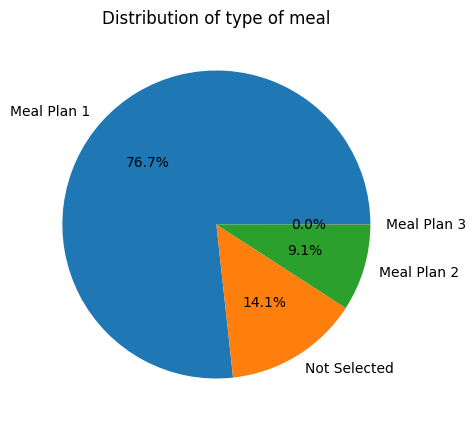

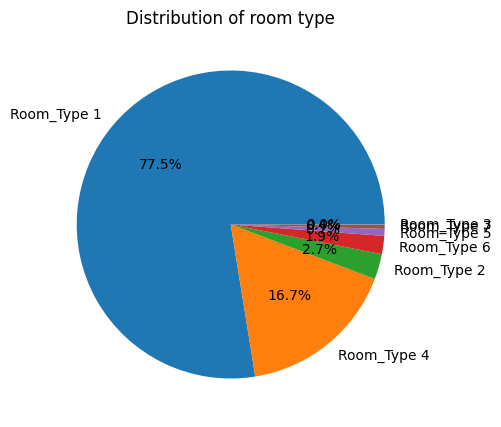

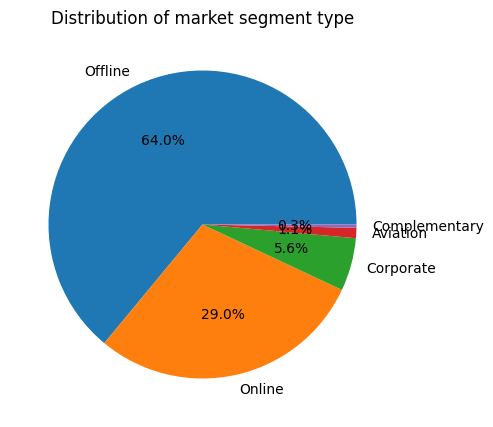

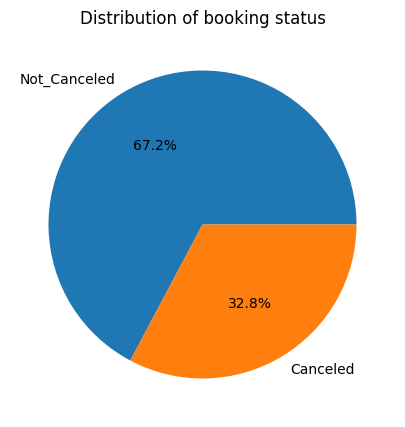

In [12]:
for feature in cat_features:
    plt.figure(figsize=(10, 5))
    plt.pie(df[feature].value_counts(),
            labels=df[feature].unique(),
            autopct='%1.1f%%'
    )
    plt.title(f'Distribution of {feature}')
    plt.show()
    print()

### Explore Numerical Features

In [13]:
num_features = ['number of adults', 'number of children', 'total_guest', 'number of weekend nights',
                'number of week nights', 'lead time', 'average price ', 'car parking space',
                'repeated', 'P-C', 'P-not-C', 'special requests', 'total_nights', 'average_price_per_night',
                'total_guest', 'average_price_per_night_per_guest']
for col in num_features:
  print(f'{col}: {df[col].unique()}')

number of adults: [1 2 3 0 4]
number of children: [ 1  0  2  3 10  9]
total_guest: [ 2  1  3  4  5 12 10 11]
number of weekend nights: [2 1 0 4 3 6 5 7]
number of week nights: [ 5  3  2  4  0  1 10  6 11  7 15  9 13  8 14 12 17 16]
lead time: [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  87 127 418 156  58
 433 111 195 119  59  78 335 103  70  76 144  49  77  36  79  21  33 164
 152  43 102  71 209  93  53 302 239  45 167 113  84   9 166 174  61 151
  52  67 282  38 175  89 133  65  66  50 159 386 115 237 125  91  29 221
 213 198  75 180 236 120 23

### Check Data Distribution

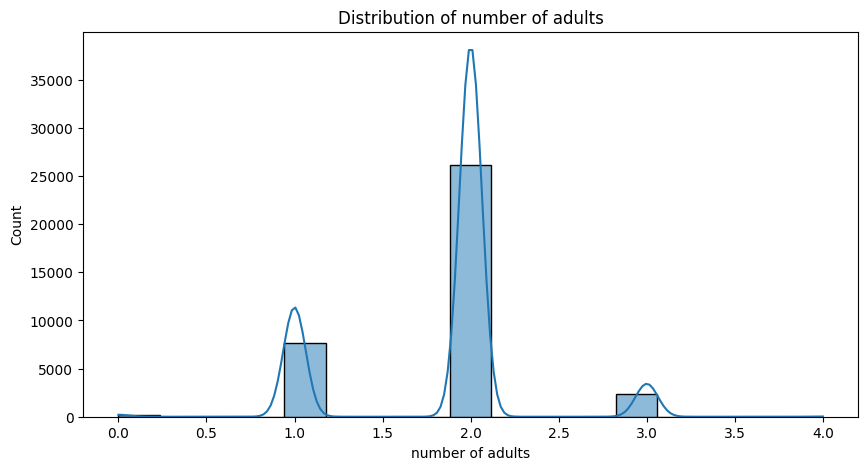

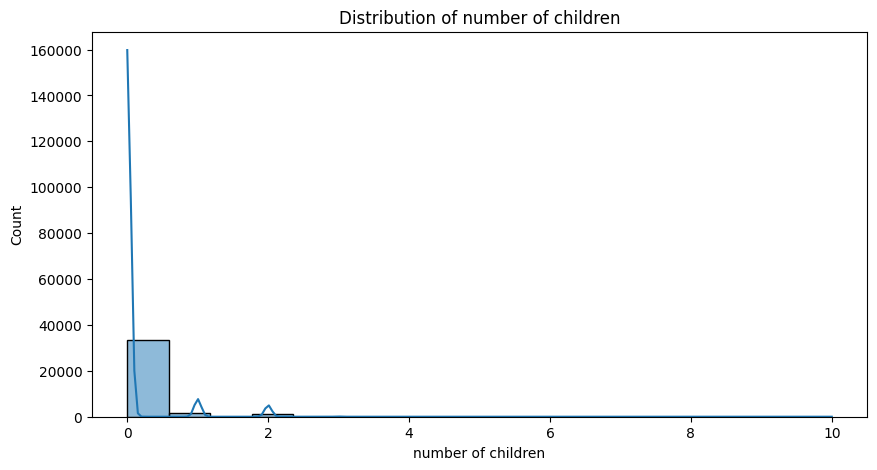

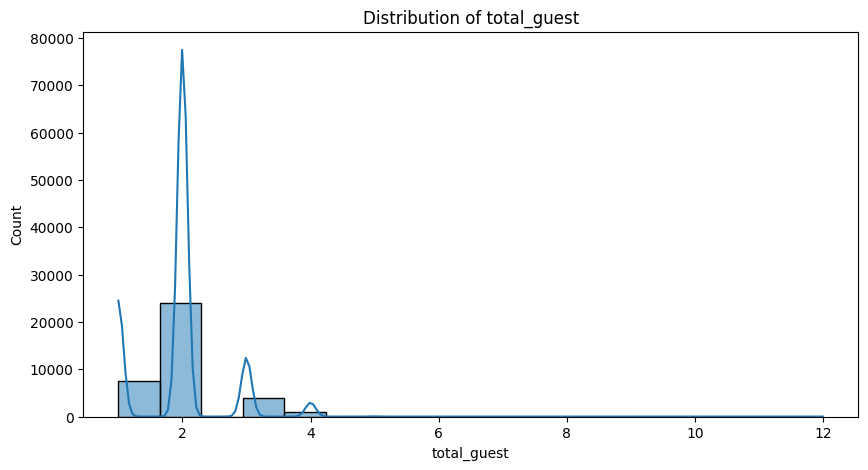

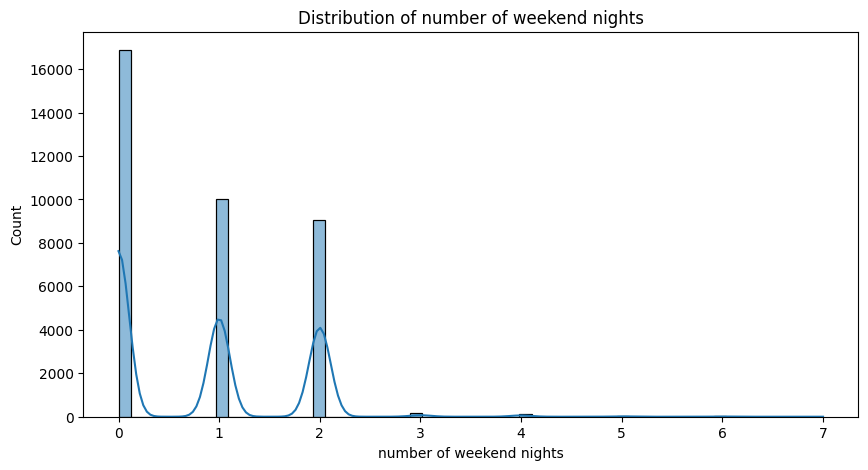

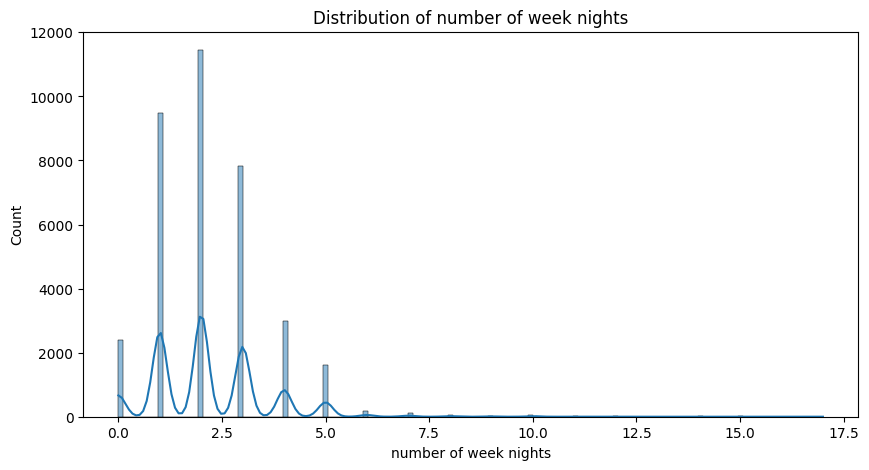

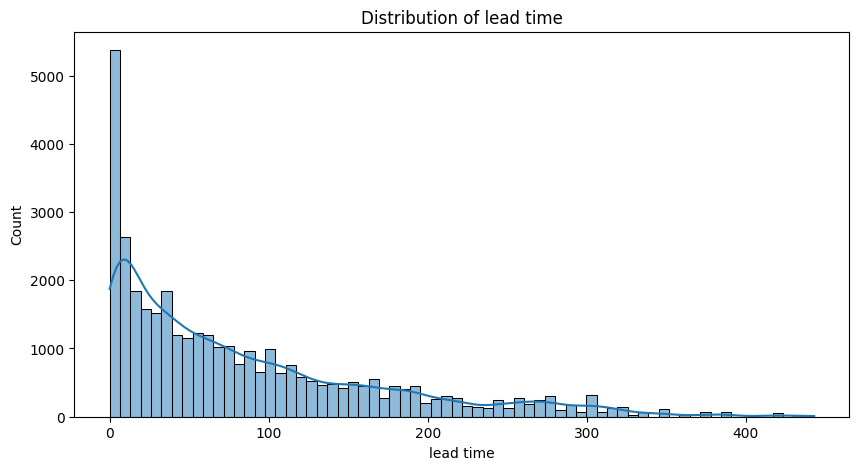

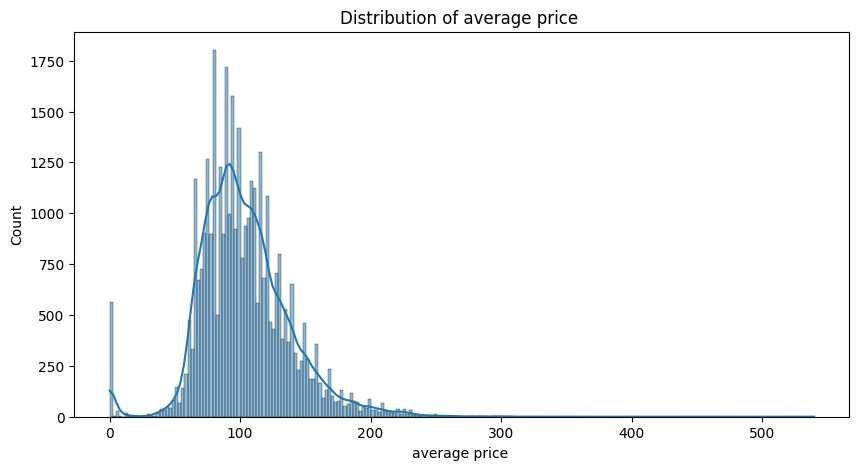

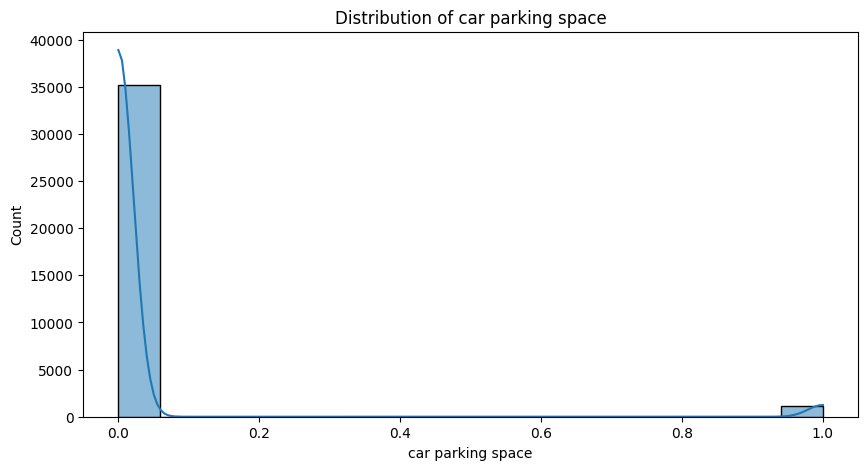

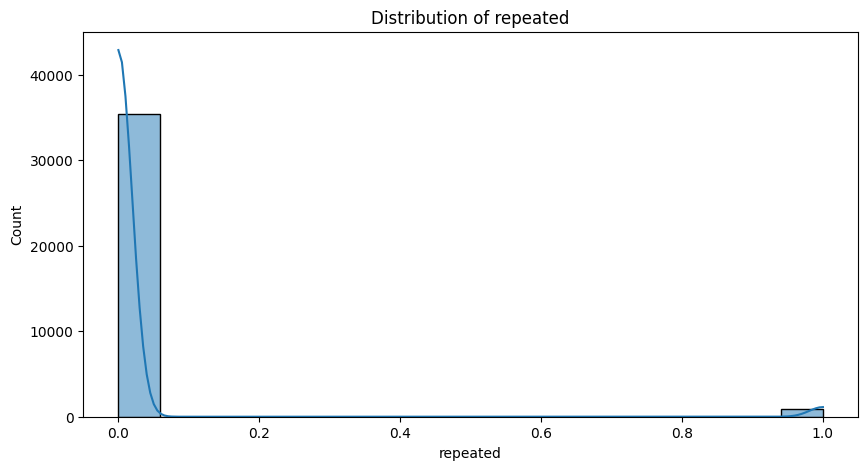

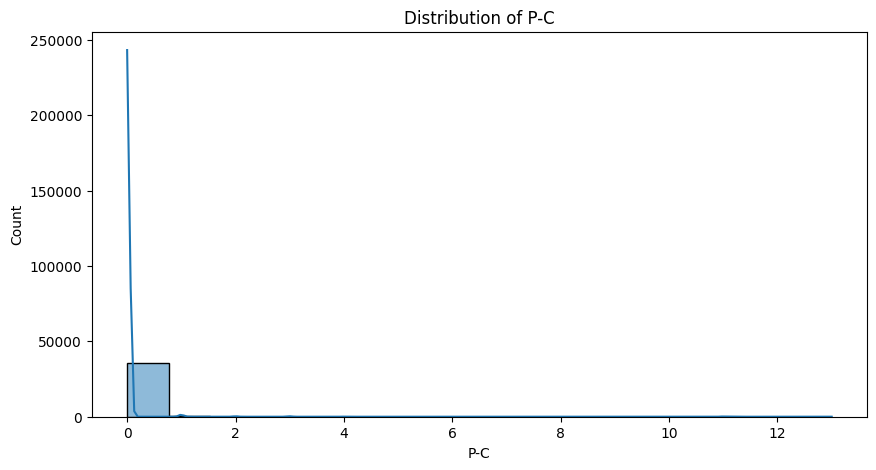

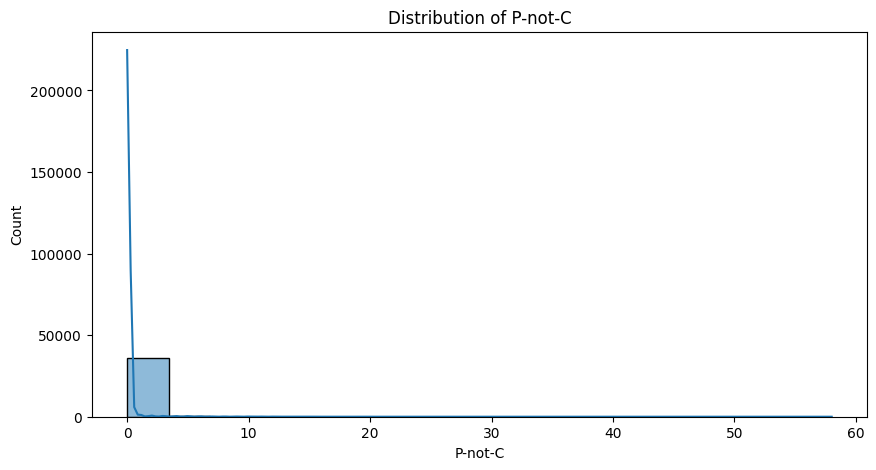

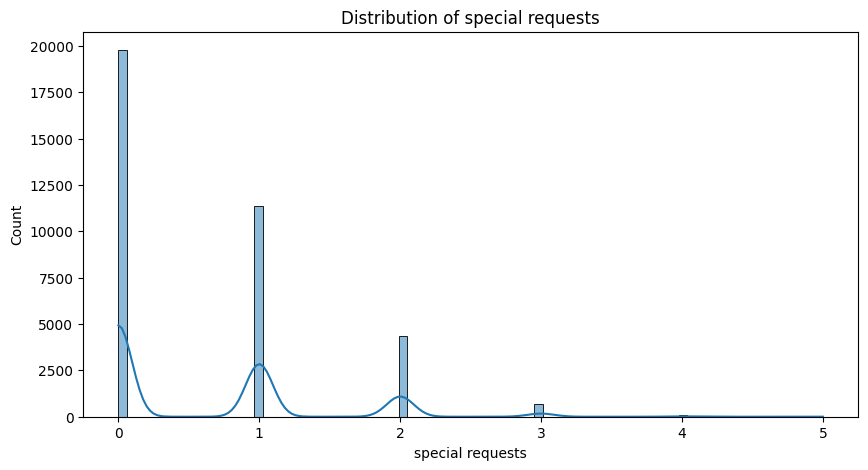

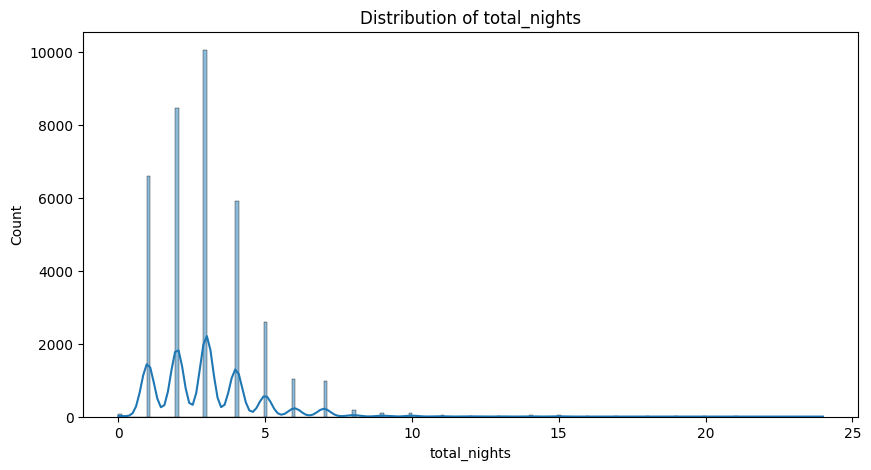

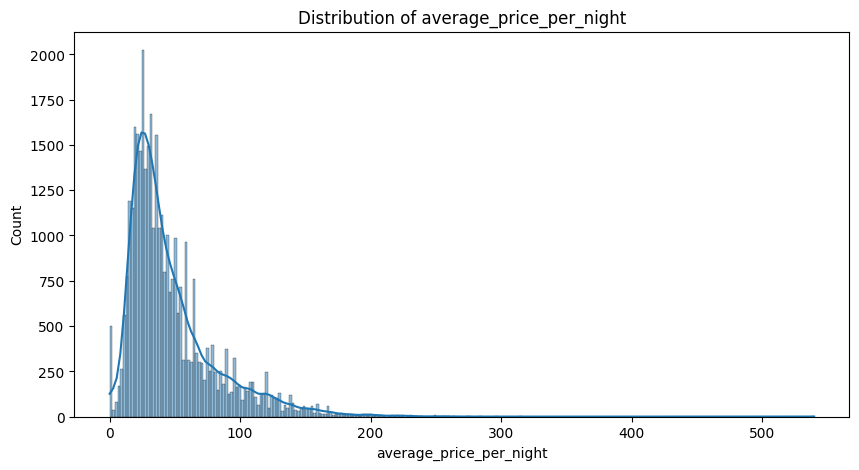

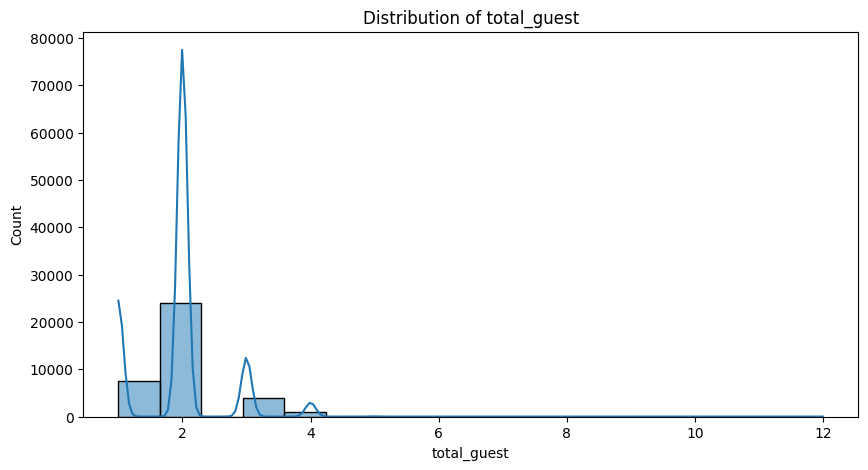

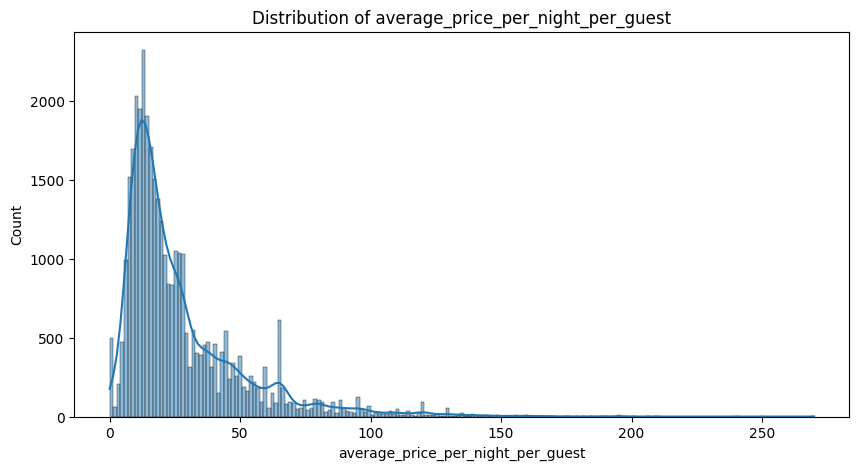

In [14]:
for feature in num_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    print()

### Time Series Analysis

In [15]:
df['date of reservation'][df['date of reservation'] == '2018-2-29'] = '2/28/2018'
df_time_series = df.copy()
df_time_series['date of reservation'] = pd.to_datetime(df_time_series['date of reservation'])
df_time_series.set_index('date of reservation', inplace=True)
df_time_series.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,total_nights,average_price_per_night,total_guest,average_price_per_night_per_guest
date of reservation,,,,,,,,,,,,,,,,,,,,
2015-10-02,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,7,12.57,2,6.28
2018-11-06,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,4,26.67,1,26.67
2018-02-28,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,4,12.50,3,4.17
2017-05-20,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,2,50.00,1,50.00
2018-04-11,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,3,25.67,1,25.67


In [16]:
# Resample data to monthly frequency and calculate mean
monthly_earns = df_time_series['average price '][df_time_series['booking status'] == 'Not_Canceled'].resample('M').sum().round(2)
monthly_earns

,average price
date of reservation,
2015-10-31,88.00
2015-11-30,0.00
2015-12-31,0.00
2016-01-31,0.00
2016-02-29,0.00
2016-03-31,0.00
2016-04-30,0.00
2016-05-31,0.00
2016-06-30,0.00


In [17]:
monthly_loss = df_time_series['average price '][df_time_series['booking status'] == 'Canceled'].resample('M').sum().round(2)
monthly_loss

,average price
date of reservation,
2016-09-30,100.00
2016-10-31,0.00
2016-11-30,0.00
2016-12-31,0.00
2017-01-31,0.00
2017-02-28,0.00
2017-03-31,0.00
2017-04-30,0.00
2017-05-31,100.00


In [18]:
monthly_earns = monthly_earns['2017-07-31':]
monthly_loss = monthly_loss['2017-07-31':]

In [19]:
monthly_earns

,average price
date of reservation,
2017-07-31,9316.67
2017-08-31,75644.59
2017-09-30,148669.58
2017-10-31,149836.82
2017-11-30,44796.66
2017-12-31,68326.34
2018-01-31,73948.46
2018-02-28,103297.96
2018-03-31,144760.27


In [20]:
monthly_loss

,average price
date of reservation,
2017-07-31,21498.57
2017-08-31,16722.09
2017-09-30,21730.14
2017-10-31,26327.95
2017-11-30,2006.74
2017-12-31,1673.13
2018-01-31,1847.80
2018-02-28,34322.17
2018-03-31,71901.49


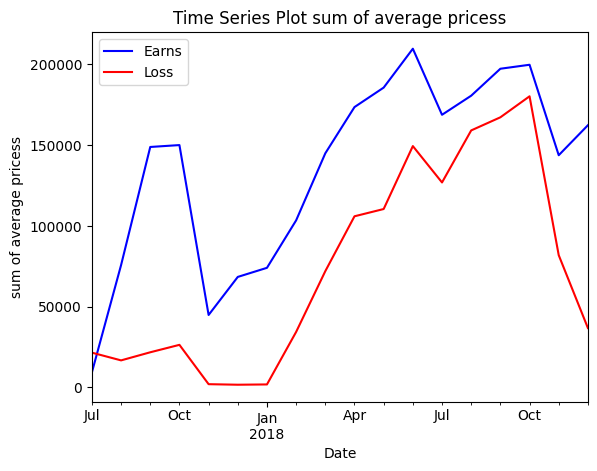

In [21]:
monthly_earns.plot(label='Earns', c='b')
monthly_loss.plot(label='Loss', c='r')
plt.title('Time Series Plot sum of average pricess')
plt.xlabel('Date')
plt.ylabel('sum of average pricess')
plt.legend()
plt.show()

In [22]:
earns_arima = ARIMA(monthly_earns, order=(1, 1, 1))
fitted_earns_arima = earns_arima.fit()
earns_arima_forecast = fitted_earns_arima.forecast(steps=10).round(2)
print(earns_arima_forecast)

2019-01-31    168838.33
2019-02-28    167590.93
2019-03-31    167822.04
2019-04-30    167779.22
2019-05-31    167787.16
2019-06-30    167785.69
2019-07-31    167785.96
2019-08-31    167785.91
2019-09-30    167785.92
2019-10-31    167785.92
Freq: M, Name: predicted_mean, dtype: float64


In [23]:
loss_arima = ARIMA(monthly_loss, order=(1, 1, 1))
fitted_loss_arima = loss_arima.fit()
loss_arima_forecast = fitted_loss_arima.forecast(steps=10).round(2)
print(loss_arima_forecast)

2019-01-31    19000.24
2019-02-28    10182.21
2019-03-31     5795.29
2019-04-30     3612.83
2019-05-31     2527.07
2019-06-30     1986.91
2019-07-31     1718.18
2019-08-31     1584.49
2019-09-30     1517.98
2019-10-31     1484.89
Freq: M, Name: predicted_mean, dtype: float64


In [24]:
earns_sarima = SARIMAX(monthly_earns, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_earns_sarima = earns_sarima.fit()
earns_sarima_forecast = fitted_earns_sarima.get_forecast(steps=10)
print(earns_sarima_forecast.summary_frame())


average price            mean   mean_se  mean_ci_lower  mean_ci_upper
2019-01-31      163640.532270  0.012299  163640.508165  163640.556375
2019-02-28      189644.406264  0.025524  189644.356237  189644.456291
2019-03-31      228368.063425  0.039853  228367.985314  228368.141536
2019-04-30      254700.756249  0.054622  254700.649193  254700.863306
2019-05-31      264908.285126  0.069439  264908.149028  264908.421223
2019-06-30      287441.973940  0.084072  287441.809163  287442.138718
2019-07-31      245369.239157  0.098381  245369.046334  245369.431979
2019-08-31      256168.581647  0.112286  256168.361571  256168.801724
2019-09-30      272006.553642  0.125746  272006.307184  272006.800100
2019-10-31      273790.437466  0.138744  273790.165533  273790.709399


In [25]:
loss_sarima = SARIMAX(monthly_loss, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted_loss_sarima = loss_sarima.fit()
loss_sarima_forecast = fitted_loss_sarima.get_forecast(steps=10)
print(loss_sarima_forecast.summary_frame())


average price           mean      mean_se  mean_ci_lower  mean_ci_upper
2019-01-31       6551.158250   312.280447    5939.099822    7163.216679
2019-02-28      12483.019650   541.986924   11420.744799   13545.294502
2019-03-31      26714.819301   757.574509   25230.000549   28199.638054
2019-04-30      40113.015341   956.377660   38238.549571   41987.481111
2019-05-31      27344.351918  1135.368902   25119.069761   29569.634075
2019-06-30      47524.808365  1289.346709   44997.735252   50051.881477
2019-07-31       9278.250863  1406.376037    6521.804481   12034.697245
2019-08-31       4545.540406  1407.278817    1787.324608    7303.756204
2019-09-30       9554.477404  1408.202479    6794.451261   12314.503546
2019-10-31      14169.984192  1409.129641   11408.140847   16931.827537


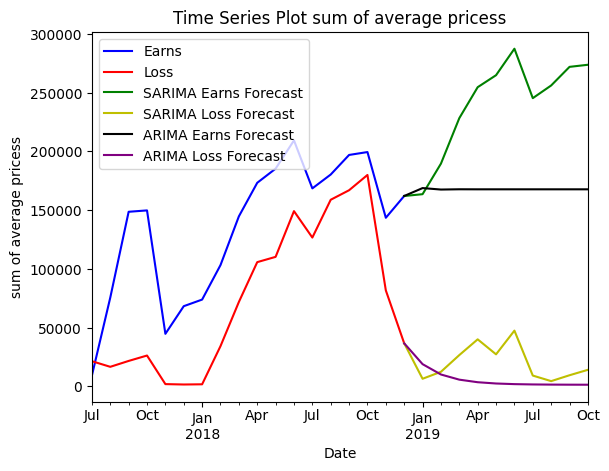

In [26]:
monthly_earns.plot(label='Earns', c='b')
monthly_loss.plot(label='Loss', c='r')
pd.concat([monthly_earns[[-1]],earns_sarima_forecast.predicted_mean]).plot(label='SARIMA Earns Forecast', c='g')
pd.concat([monthly_loss[[-1]],loss_sarima_forecast.predicted_mean]).plot(label='SARIMA Loss Forecast', c='y')
pd.concat([monthly_earns[[-1]],earns_arima_forecast]).plot(label='ARIMA Earns Forecast', c='k')
pd.concat([monthly_loss[[-1]],loss_arima_forecast]).plot(label='ARIMA Loss Forecast', c='purple')
plt.title('Time Series Plot sum of average pricess')
plt.xlabel('Date')
plt.ylabel('sum of average pricess')
plt.legend()
plt.show()

In [37]:
df_time_series['canceled'] = (df_time_series['booking status'] == 'Canceled').astype(int)
df_time_series['completed'] = (df_time_series['booking status'] == 'Not_Canceled').astype(int)
df_time_series.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,...,special requests,booking status,total_nights,average_price_per_night,total_guest,average_price_per_night_per_guest,Canceled,Not_Canceled,canceled,completed
date of reservation,,,,,,,,,,,,,,,,,,,,,
2015-10-02,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,...,0,Not_Canceled,7,12.57,2,6.28,0,1,0,1
2018-11-06,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,...,1,Not_Canceled,4,26.67,1,26.67,0,1,0,1
2018-02-28,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,...,0,Canceled,4,12.50,3,4.17,1,0,1,0
2017-05-20,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,...,1,Canceled,2,50.00,1,50.00,1,0,1,0
2018-04-11,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,...,0,Canceled,3,25.67,1,25.67,1,0,1,0


In [38]:
monthly_canceled_rate = df_time_series['canceled'].resample('M').sum()
monthly_canceled_rate

,canceled
date of reservation,
2015-10-31,0
2015-11-30,0
2015-12-31,0
2016-01-31,0
2016-02-29,0
2016-03-31,0
2016-04-30,0
2016-05-31,0
2016-06-30,0


In [39]:
monthly_completed_rate = df_time_series['completed'].resample('M').sum()
monthly_completed_rate

,completed
date of reservation,
2015-10-31,1
2015-11-30,0
2015-12-31,0
2016-01-31,0
2016-02-29,0
2016-03-31,0
2016-04-30,0
2016-05-31,0
2016-06-30,0


In [40]:
monthly_completed_rate = monthly_completed_rate['2017-07-31':]
monthly_canceled_rate = monthly_canceled_rate['2017-07-31':]

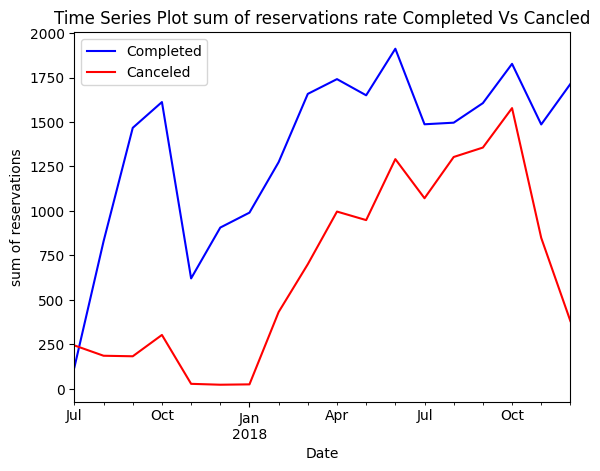

In [41]:
monthly_completed_rate.plot(label='Completed', c='b')
monthly_canceled_rate.plot(label='Canceled', c='r')
plt.title('Time Series Plot sum of reservations rate Completed Vs Cancled')
plt.xlabel('Date')
plt.ylabel('sum of reservations')
plt.legend()
plt.show()

In [42]:
total_reservations = monthly_completed_rate + monthly_canceled_rate
total_reservations

,0
date of reservation,
2017-07-31,363
2017-08-31,1014
2017-09-30,1649
2017-10-31,1914
2017-11-30,647
2017-12-31,928
2018-01-31,1014
2018-02-28,1705
2018-03-31,2358


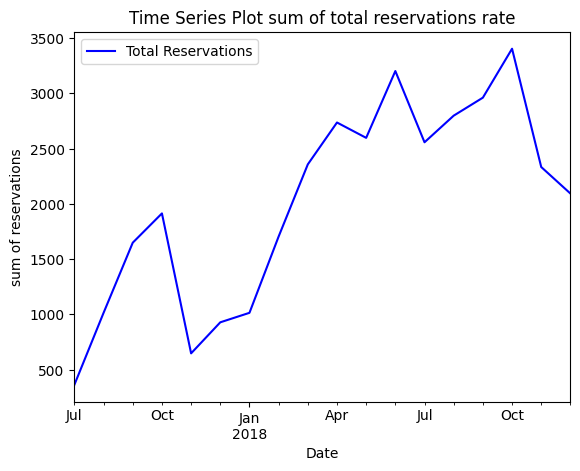

In [43]:
total_reservations.plot(label='Total Reservations', c='b')
plt.title('Time Series Plot sum of total reservations rate')
plt.xlabel('Date')
plt.ylabel('sum of reservations')
plt.legend()
plt.show()

In [45]:
completed_children_rate = df_time_series['completed'][df_time_series['number of children'] > 0].resample('M').sum()
completed_children_rate

,completed
date of reservation,
2015-10-31,1
2015-11-30,0
2015-12-31,0
2016-01-31,0
2016-02-29,0
2016-03-31,0
2016-04-30,0
2016-05-31,0
2016-06-30,0


In [47]:
canceled_children_rate = df_time_series['canceled'][df_time_series['number of children'] > 0].resample('M').sum()
canceled_children_rate

,canceled
date of reservation,
2015-10-31,0
2015-11-30,0
2015-12-31,0
2016-01-31,0
2016-02-29,0
2016-03-31,0
2016-04-30,0
2016-05-31,0
2016-06-30,0


In [48]:
canceled_children_rate = canceled_children_rate ['2017-07-31':]
completed_children_rate = completed_children_rate ['2017-07-31':]
all_children_rate = completed_children_rate + canceled_children_rate

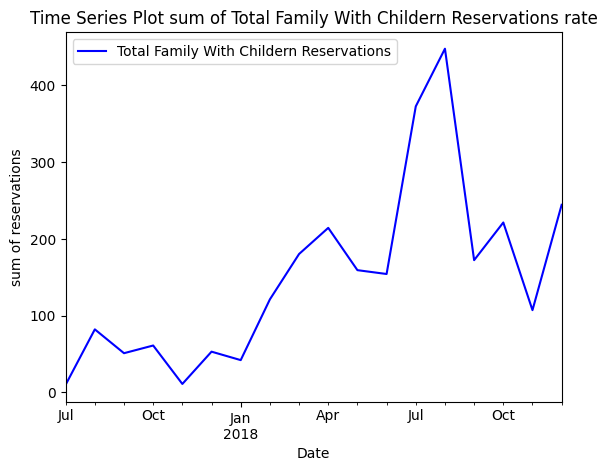

In [49]:
all_children_rate.plot(label='Total Family With Childern Reservations', c='b')
plt.title('Time Series Plot sum of Total Family With Childern Reservations rate')
plt.xlabel('Date')
plt.ylabel('sum of reservations')
plt.legend()
plt.show()

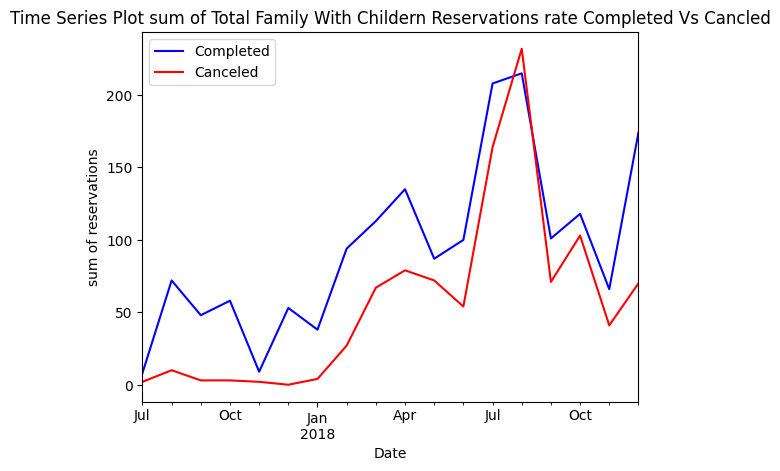

In [50]:
completed_children_rate.plot(label='Completed', c='b')
canceled_children_rate.plot(label='Canceled', c='r')
plt.title('Time Series Plot sum of Total Family With Childern Reservations rate Completed Vs Cancled')
plt.xlabel('Date')
plt.ylabel('sum of reservations')
plt.legend()
plt.show()

## Step 5: Outlier Detection & Treatment

### Features Transformation

In [ ]:
df['total_nights_cat'] = pd.cut(df['total_nights'],
                               bins = [0, 2, 4, 6, 8, np.inf],
                               labels= [1, 2, 3, 4, 5])

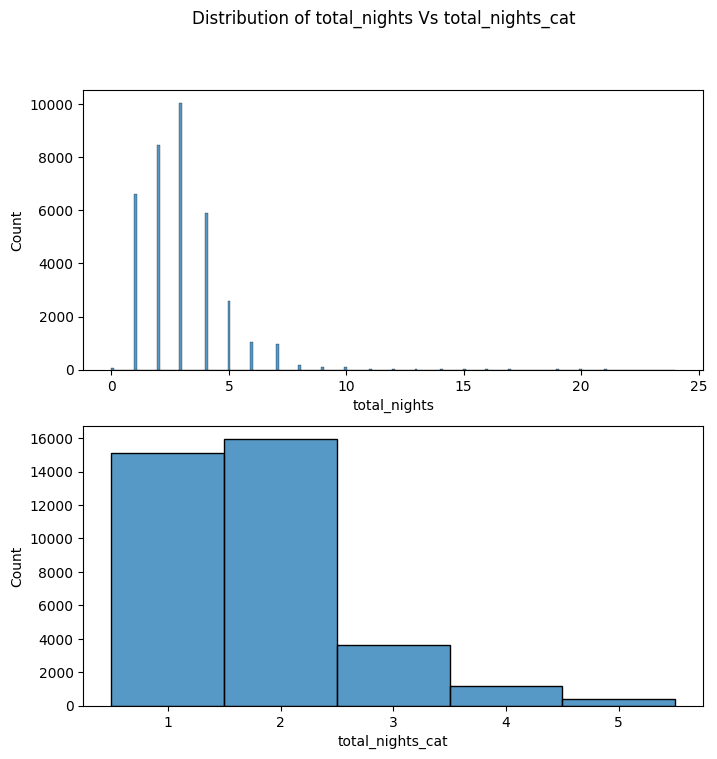

In [ ]:
compare_features(df, 'total_nights', 'total_nights_cat')

In [ ]:
df['average_price_per_night_per_guest_cat'] = pd.cut(df['average_price_per_night_per_guest'],
                               bins = [0, 20, 40, 60, np.inf],
                               labels= [1, 2, 3, 4])

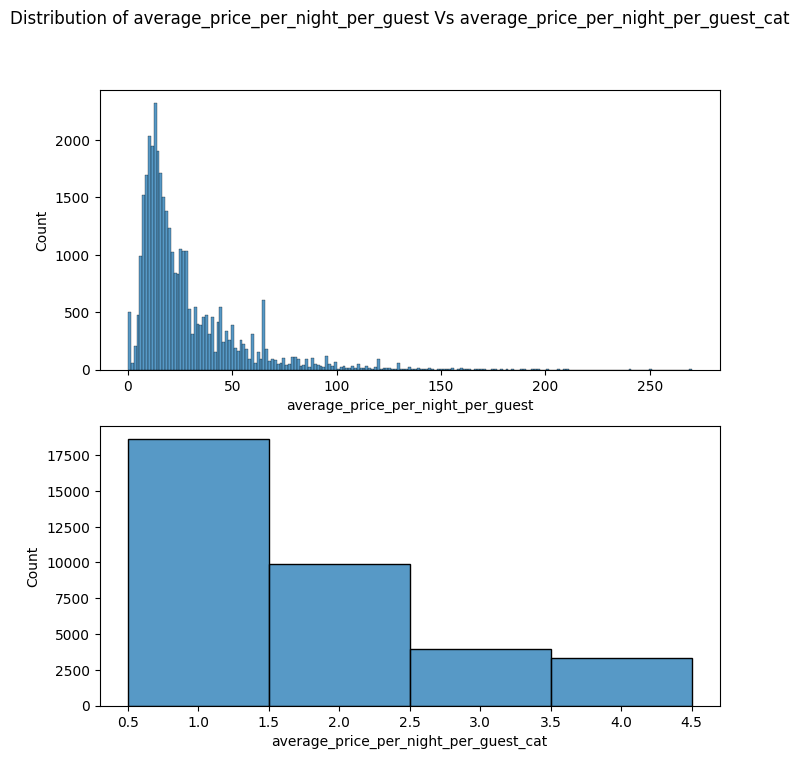

In [ ]:
compare_features(df, 'average_price_per_night_per_guest', 'average_price_per_night_per_guest_cat')

In [ ]:
df['average_price_per_night_cat'] = pd.cut(df['average_price_per_night'],
                               bins = [0, 25, 50, 150, np.inf],
                               labels= [1, 2, 3, 4])

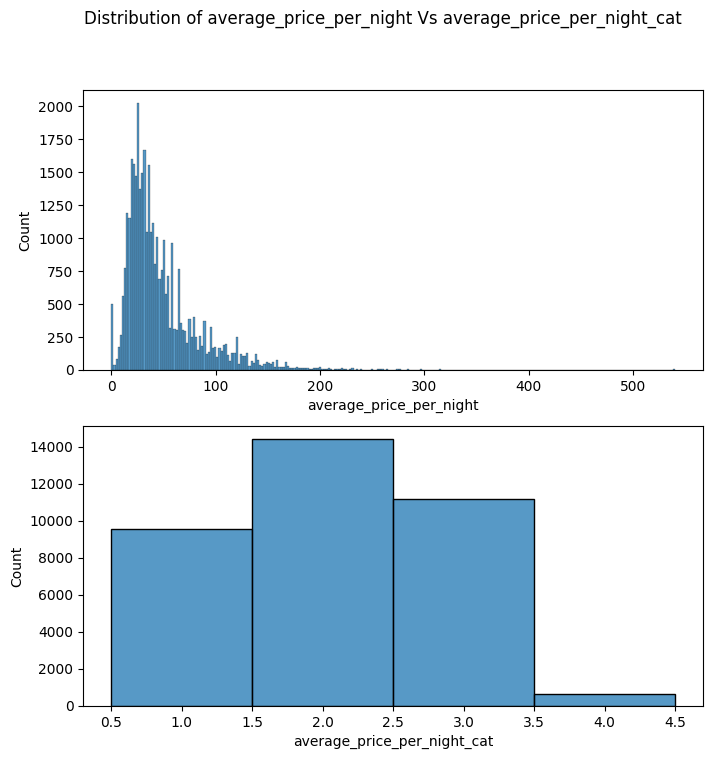

In [ ]:
compare_features(df, 'average_price_per_night', 'average_price_per_night_cat')

In [ ]:
df['total_guest_cat'] = pd.cut(df['total_guest'],
                               bins = [0, 1, 2, 3, np.inf],
                               labels= [1, 2, 3, 4])

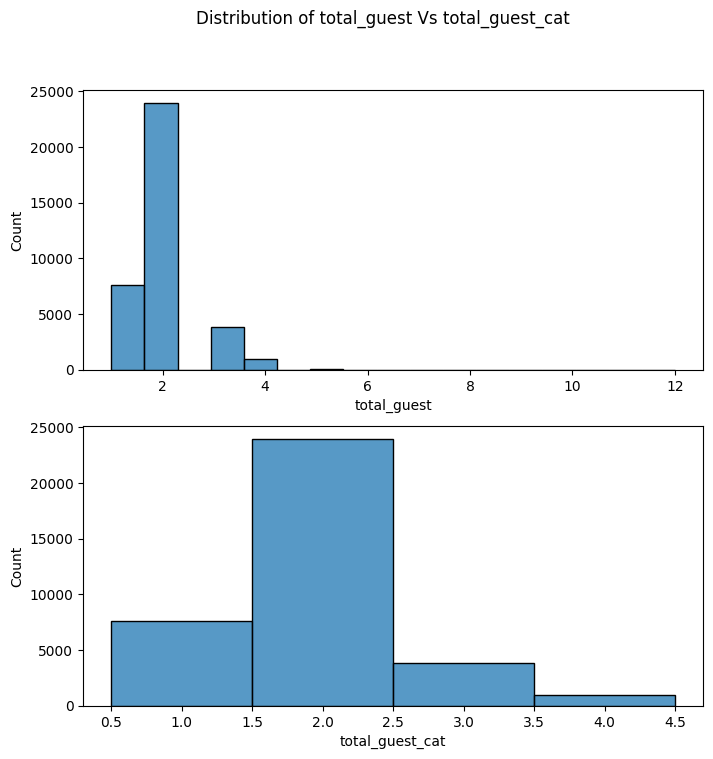

In [ ]:
compare_features(df, 'total_guest', 'total_guest_cat')

In [ ]:
df['average_price_cat'] = pd.cut(df['average price '],
                               bins = [0, 50, 100, 150, 200, np.inf],
                               labels= [1, 2, 3, 4, 5])

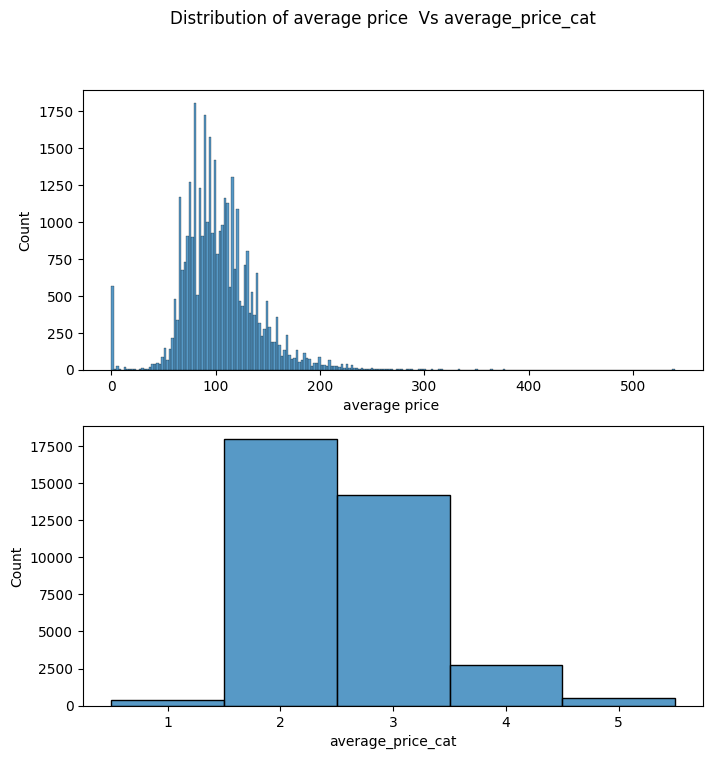

In [ ]:
compare_features(df, 'average price ', 'average_price_cat')

In [ ]:
df['lead_time_cat'] = pd.cut(df['lead time'],
                               bins = [0, 75, 150, 225, 300, np.inf],
                               labels= [1, 2, 3, 4, 5])

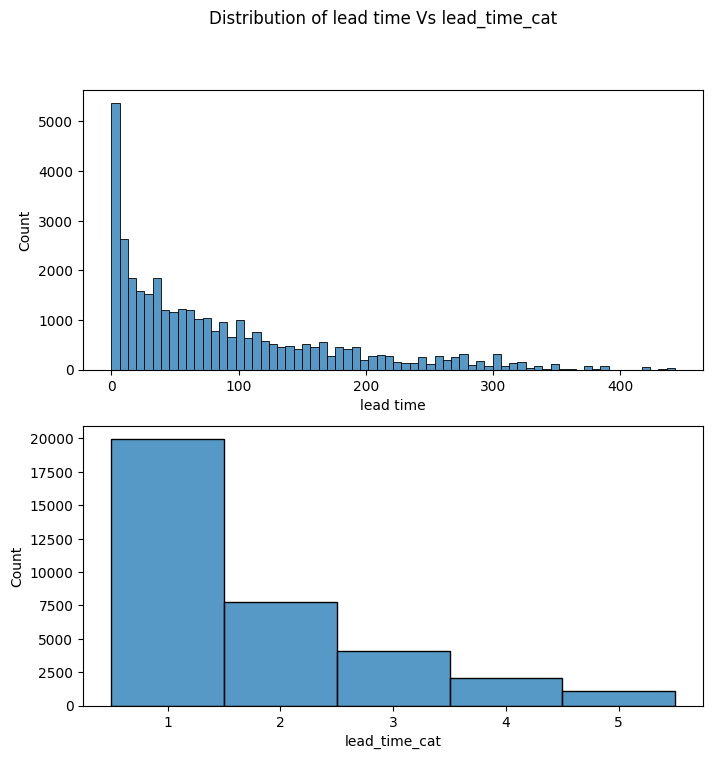

In [ ]:
compare_features(df, 'lead time', 'lead_time_cat')

In [ ]:
derived_features =['total_guest_cat', 'average_price_cat', 'lead_time_cat', 'average_price_per_night_cat', 'average_price_per_night_per_guest_cat', 'total_nights_cat']

### Check Outlier

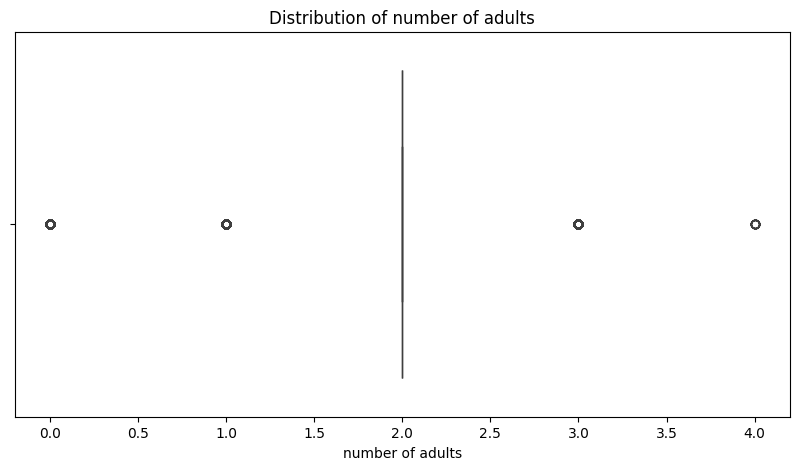

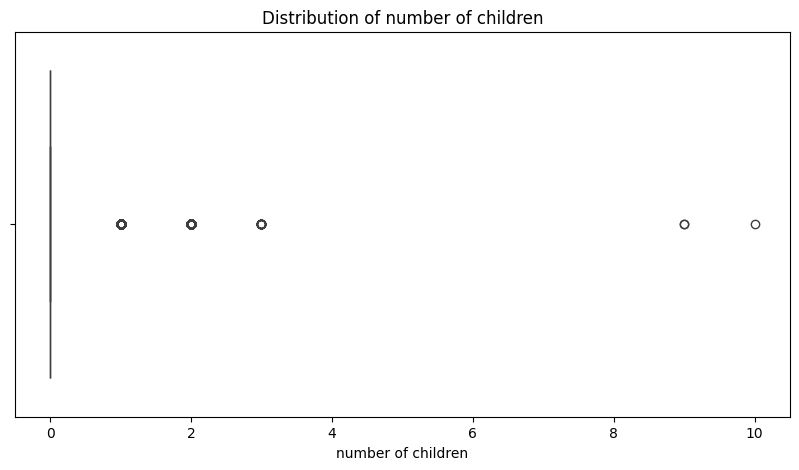

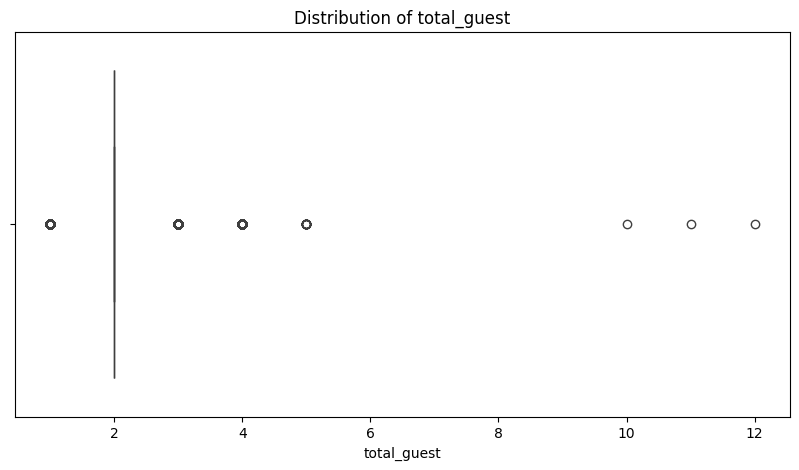

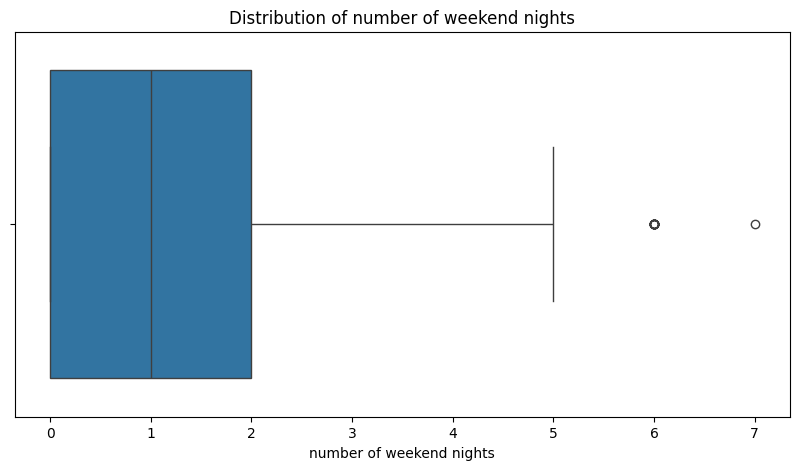

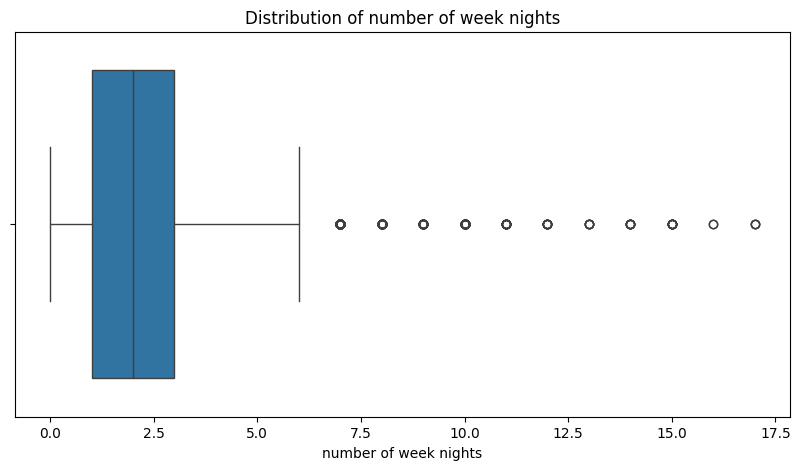

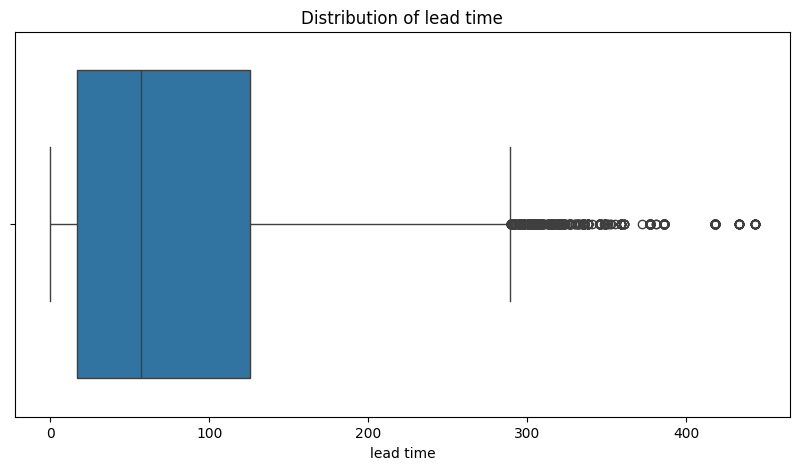

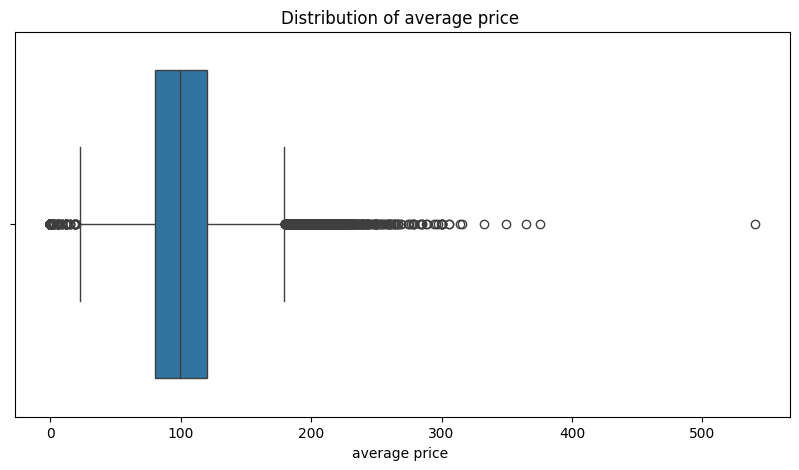

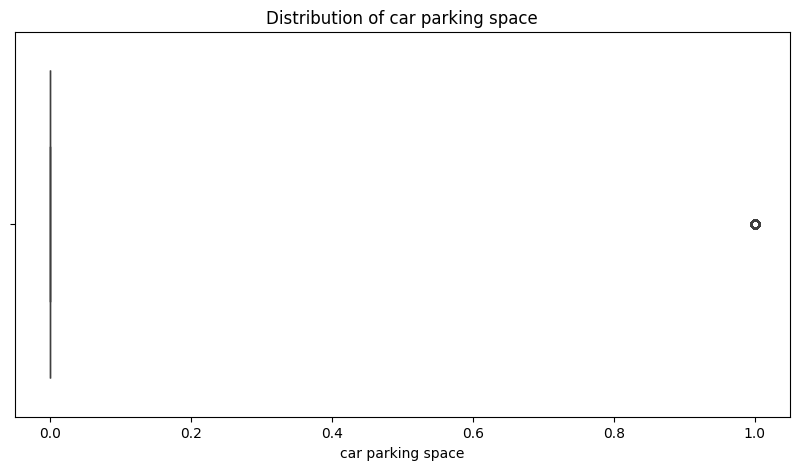

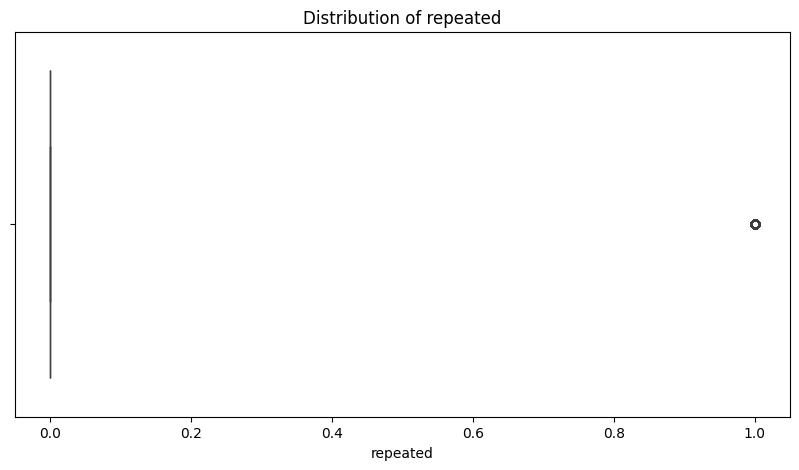

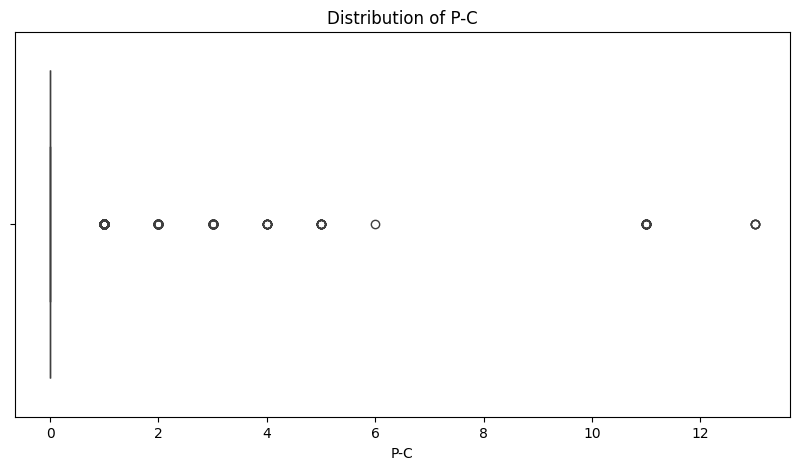

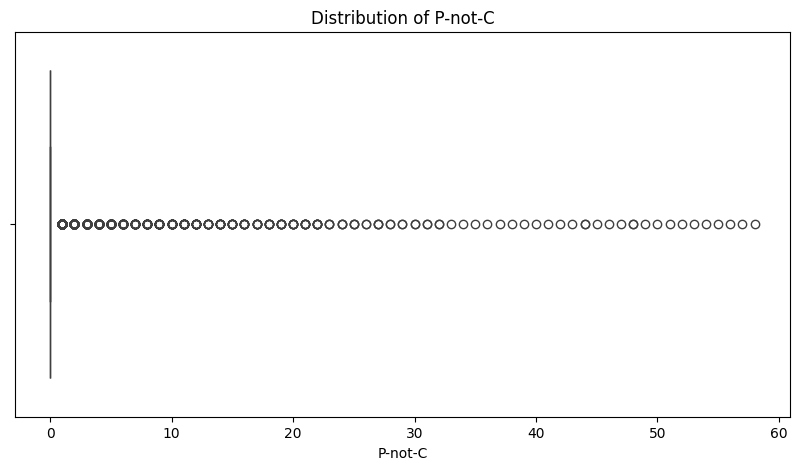

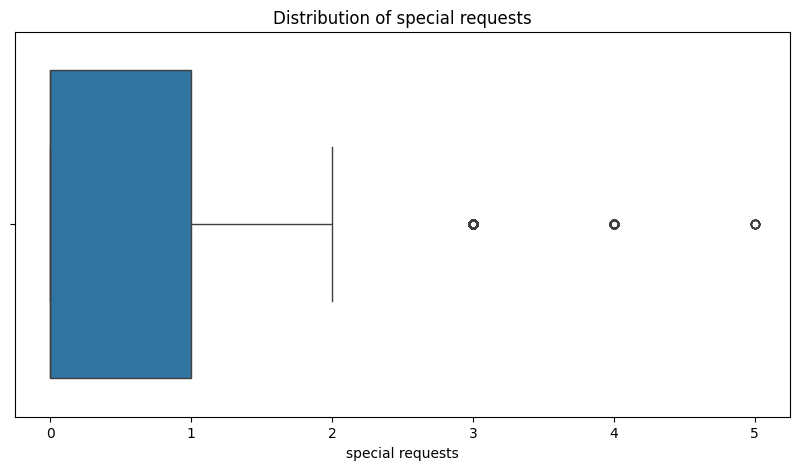

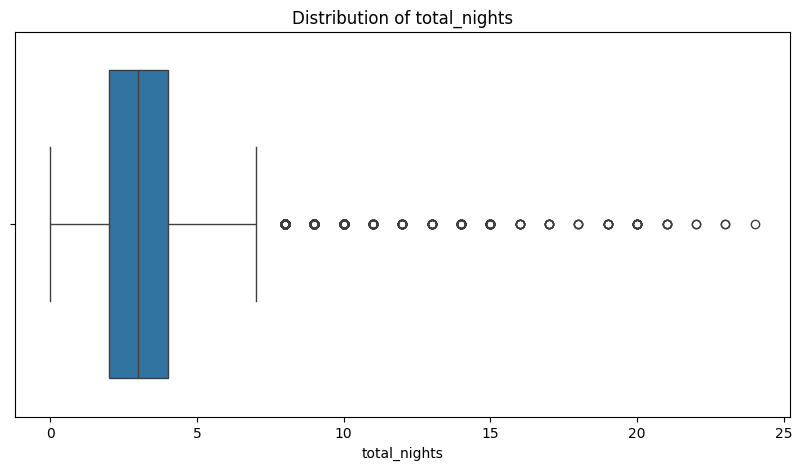

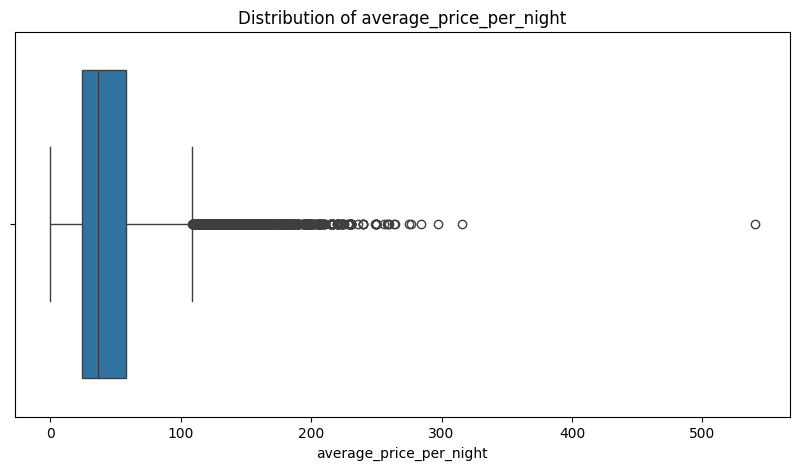

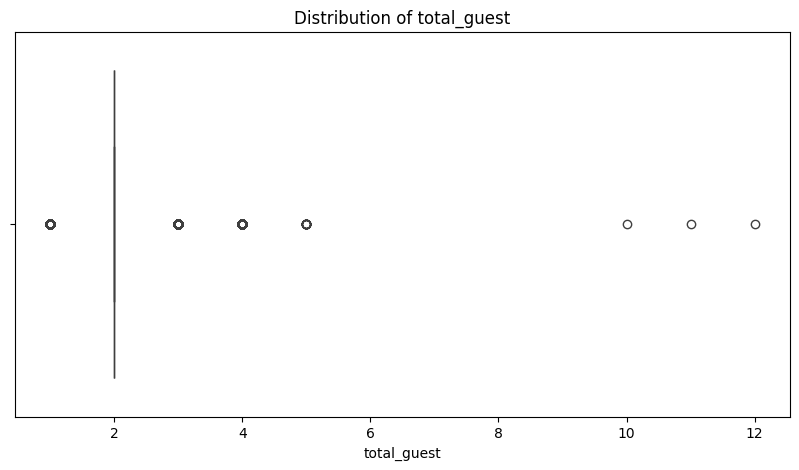

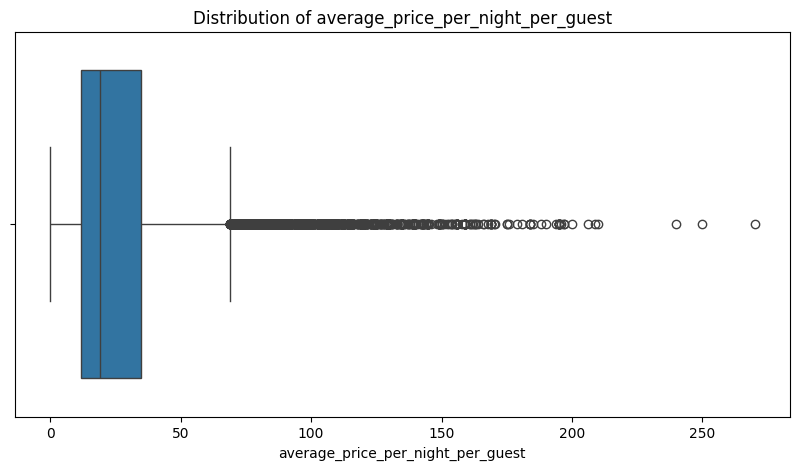

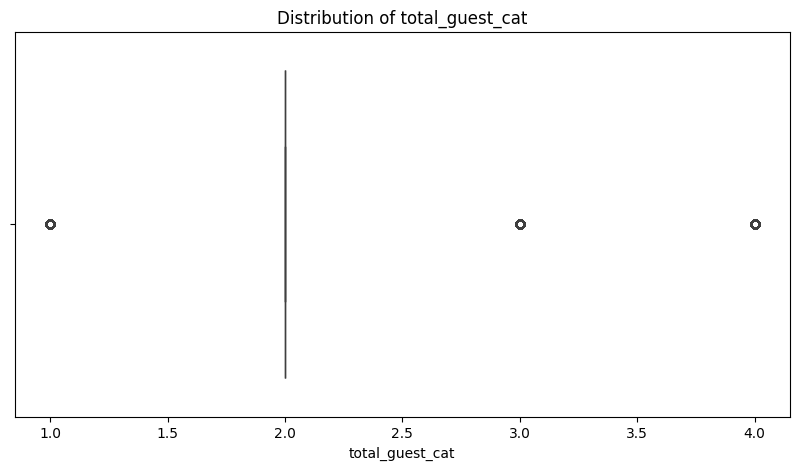

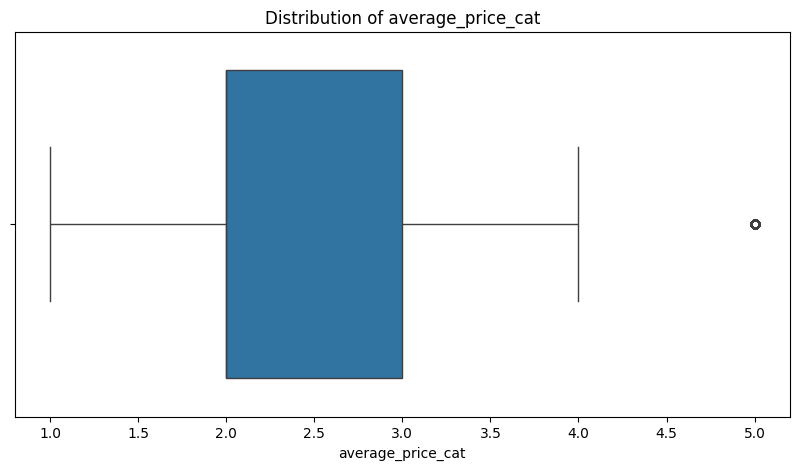

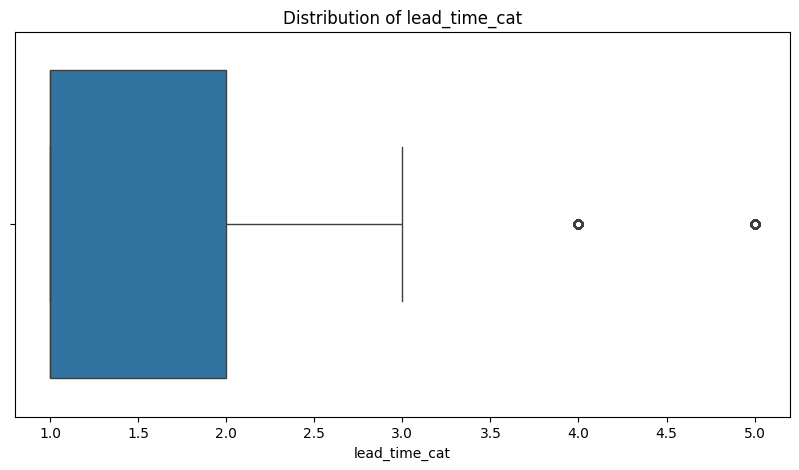

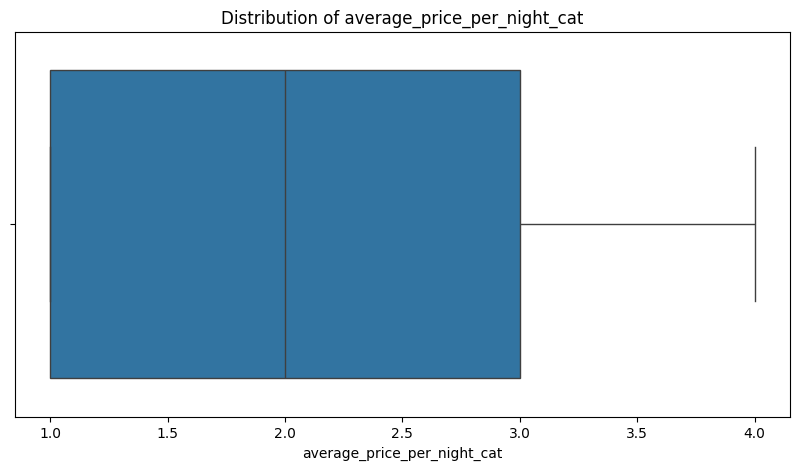

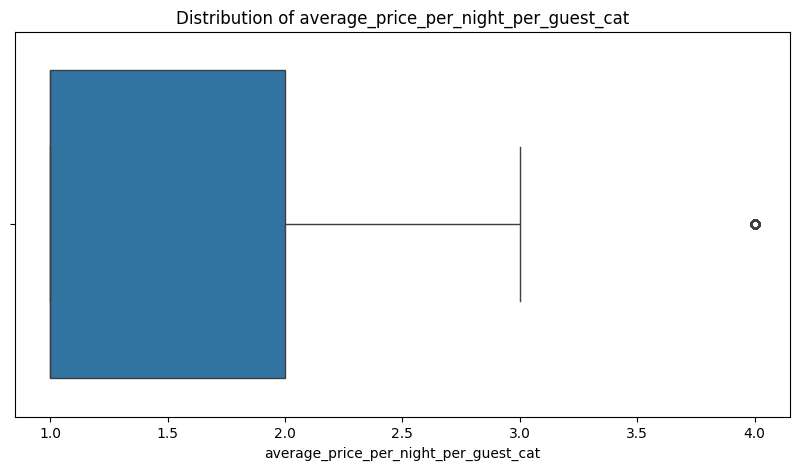

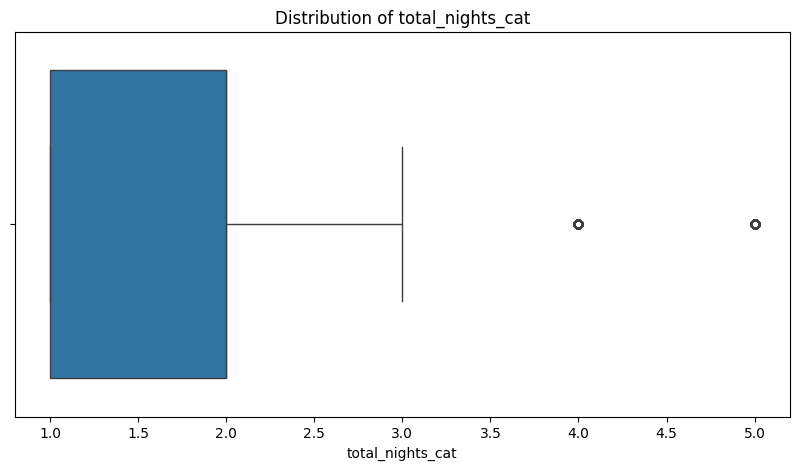

In [ ]:
for feature in num_features + derived_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()
    print()

## Step 6: Feature Relationships


### Drop Unnessary Features

In [ ]:
df_encoding = df.copy()
df_encoding.drop(columns=['Booking_ID', 'date of reservation'], axis=1, inplace=True)
df_encoding.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,...,total_nights,average_price_per_night,total_guest,average_price_per_night_per_guest,total_guest_cat,average_price_cat,lead_time_cat,average_price_per_night_cat,average_price_per_night_per_guest_cat,total_nights_cat
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,...,7,12.57,2,6.28,2,2,3,1,1,4
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,...,4,26.67,1,26.67,1,3,1,2,2,2
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,...,4,12.50,3,4.17,3,1,1,1,1,2
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,...,2,50.00,1,50.00,1,2,3,2,3,1
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,...,3,25.67,1,25.67,1,2,1,2,2,2


#### features Encoding

In [ ]:
label_map = {
    'Not_Canceled': 1,
    'Canceled': 0
}
df_encoding['booking status'] = df_encoding['booking status'].map(label_map)
df_encoding.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,...,total_nights,average_price_per_night,total_guest,average_price_per_night_per_guest,total_guest_cat,average_price_cat,lead_time_cat,average_price_per_night_cat,average_price_per_night_per_guest_cat,total_nights_cat
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,...,7,12.57,2,6.28,2,2,3,1,1,4
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,...,4,26.67,1,26.67,1,3,1,2,2,2
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,...,4,12.50,3,4.17,3,1,1,1,1,2
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,...,2,50.00,1,50.00,1,2,3,2,3,1
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,...,3,25.67,1,25.67,1,2,1,2,2,2


In [ ]:
df_encoding = pd.get_dummies(df_encoding,columns=['type of meal', 'room type', 'market segment type'], dtype=int)
df_encoding.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,0,224,0,0,0,88.00,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,3,0,5,0,0,0,106.68,...,0,0,0,0,0,0,0,0,0,1
2,2,1,1,3,0,1,0,0,0,50.00,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,2,0,211,0,0,0,100.00,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,2,0,48,0,0,0,77.00,...,0,0,0,0,0,0,0,0,0,1


#### Correlation Matrix

In [ ]:
corr_matrix = df_encoding.corr()
corr_matrix['booking status'].sort_values(ascending=False)

,booking status
booking status,1.000000
special requests,0.253092
market segment type_Corporate,0.112985
repeated,0.107277
average_price_per_night_per_guest_cat,0.094526
car parking space,0.086179
average_price_per_night_per_guest,0.073469
market segment type_Complementary,0.072860
type of meal_Meal Plan 1,0.061366
P-not-C,0.060174


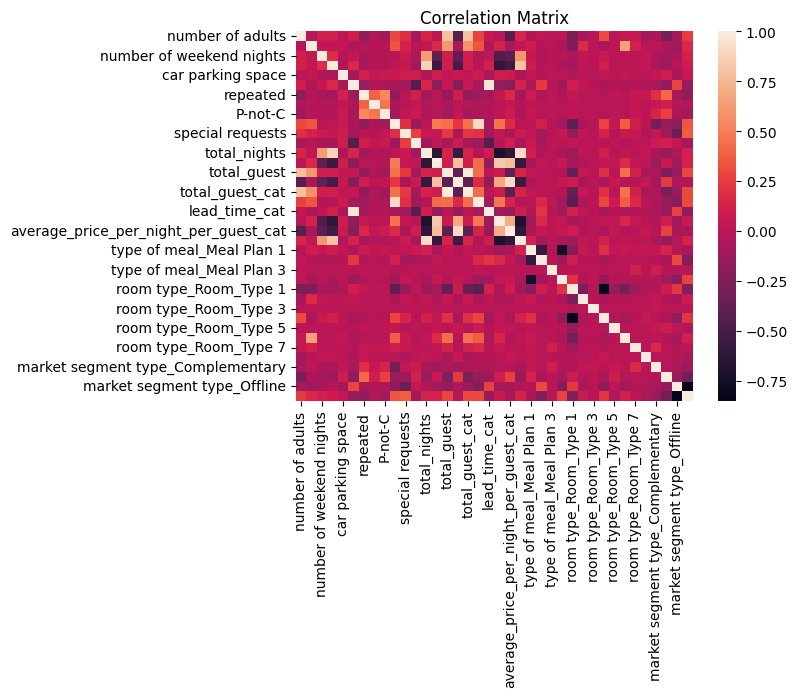

In [ ]:
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix')
plt.show()

### Check Features Relations

booking status
Not_Canceled    26
Canceled         4
Name: count, dtype: int64
the probability of P_C greater than or equal 6 to the all population is 0.08


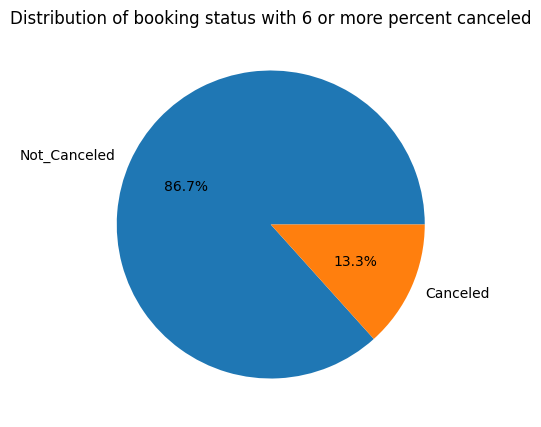

In [ ]:
#@title Let's move the probability of canceled value and see the effect on booking status(Double click to unhide code) { run: "auto", vertical-output: true }
percent = 6 #@param {type:"slider", min:0, max:100, step:1}
P_C_values_counts = df['booking status'][df['P-C'] >= percent].value_counts()
percent_of_pc_out_of_population = round(P_C_values_counts.sum() / len(df) * 100, 2)
print(P_C_values_counts)
print(f"the probability of P_C greater than or equal {percent} to the all population is {percent_of_pc_out_of_population}")
if P_C_values_counts.shape[0] == len(df['booking status'].unique()):
    plt.figure(figsize=(10, 5))
    plt.pie(P_C_values_counts, labels=df['booking status'].unique(), autopct='%1.1f%%')
    plt.title(f'Distribution of booking status with {percent} or more percent canceled')
    plt.show()
else:
    print('The output has classes less that the target classes')

booking status
Not_Canceled    805
Canceled          7
Name: count, dtype: int64
the probability of P_not_C greater than or equal 1 to the all population is 2.24


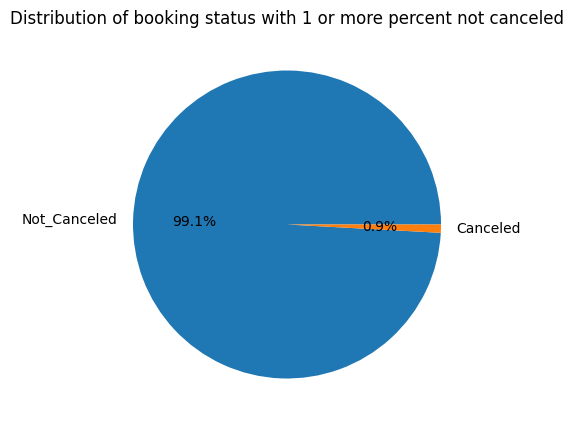

In [ ]:
#@title Let's move the probability of canceled value and see the effect on booking status(Double click to unhide code) { run: "auto", vertical-output: true }
percent = 1 #@param {type:"slider", min:0, max:100, step:1}
P_not_C_values_counts = df['booking status'][df['P-not-C'] >= percent].value_counts()
percent_of_p_not_c_out_of_population = round(P_not_C_values_counts.sum() / len(df) * 100, 2)
print(P_not_C_values_counts)
print(f"the probability of P_not_C greater than or equal {percent} to the all population is {percent_of_p_not_c_out_of_population}")
if P_not_C_values_counts.shape[0] == len(df['booking status'].unique()):
    plt.figure(figsize=(10, 5))
    plt.pie(P_not_C_values_counts, labels=df['booking status'].unique(), autopct='%1.1f%%')
    plt.title(f'Distribution of booking status with {percent} or more percent not canceled')
    plt.show()
else:
    print('The output has classes less that the target classes')

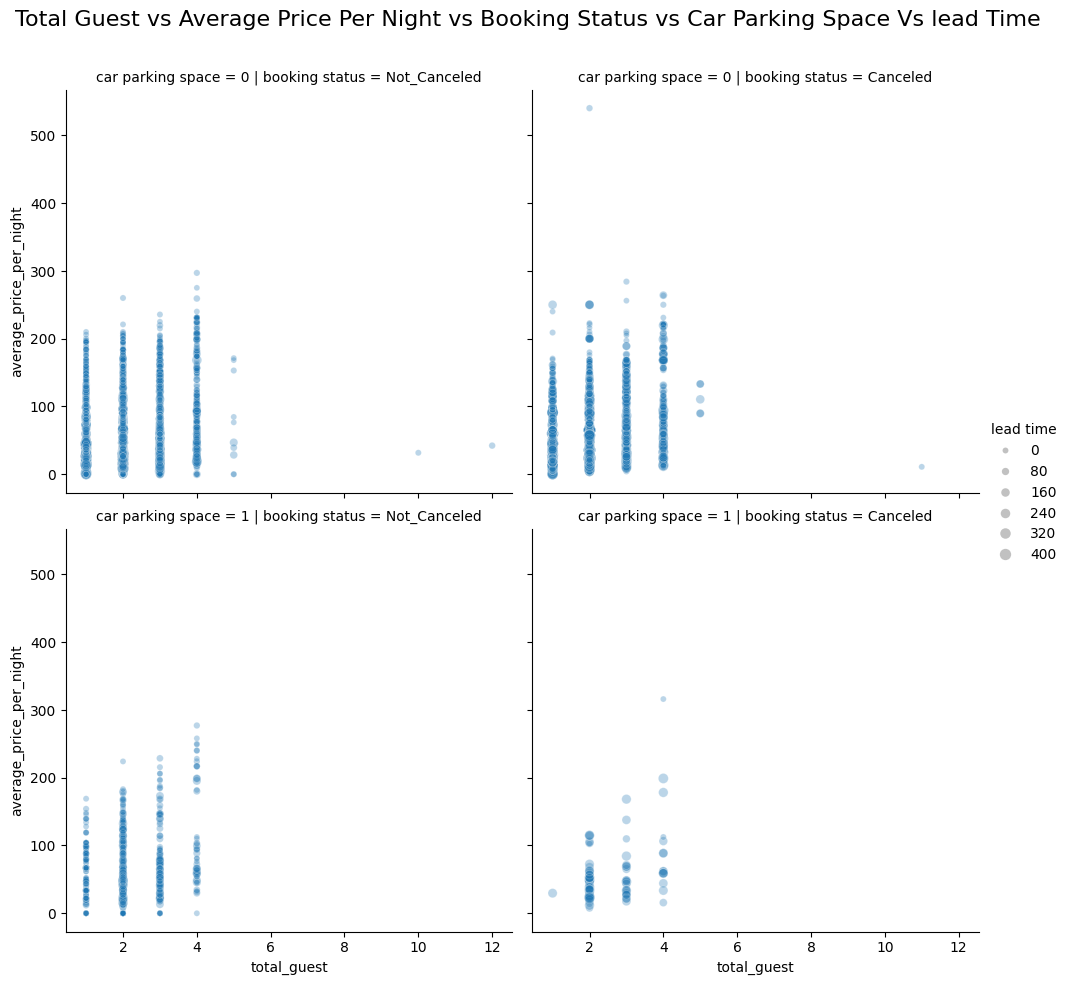

In [ ]:
title = 'Total Guest vs Average Price Per Night vs Booking Status vs Car Parking Space Vs lead Time'
relation_features(
    data=df,
    x='total_guest',
    y='average_price_per_night',
    size='lead time',
    row='car parking space',
    col='booking status',
    alpha=0.3,
    title=title
)


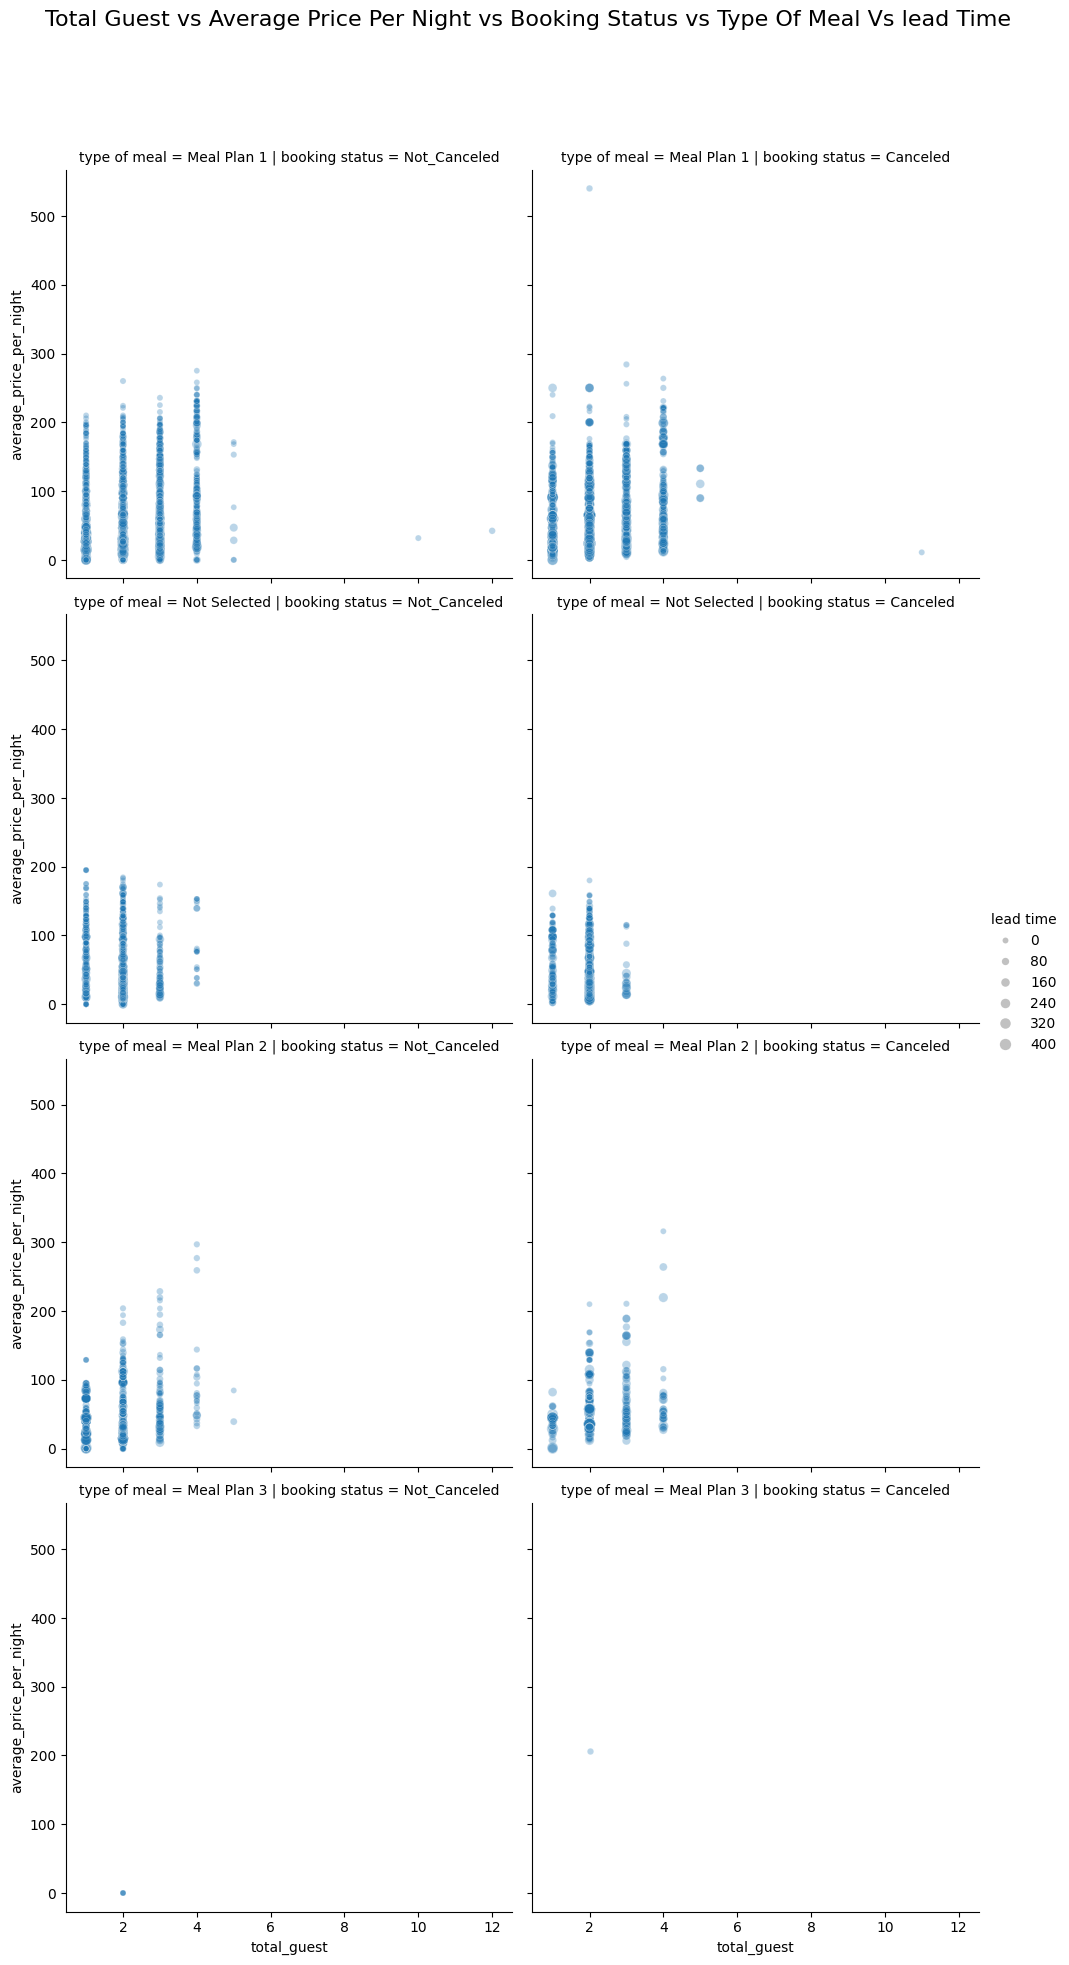

In [ ]:
title = 'Total Guest vs Average Price Per Night vs Booking Status vs Type Of Meal Vs lead Time'
relation_features(data=df,
                x='total_guest',
                y='average_price_per_night',
                size='lead time',
                row='type of meal',
                col='booking status',
                alpha = 0.3,
                title = title
)

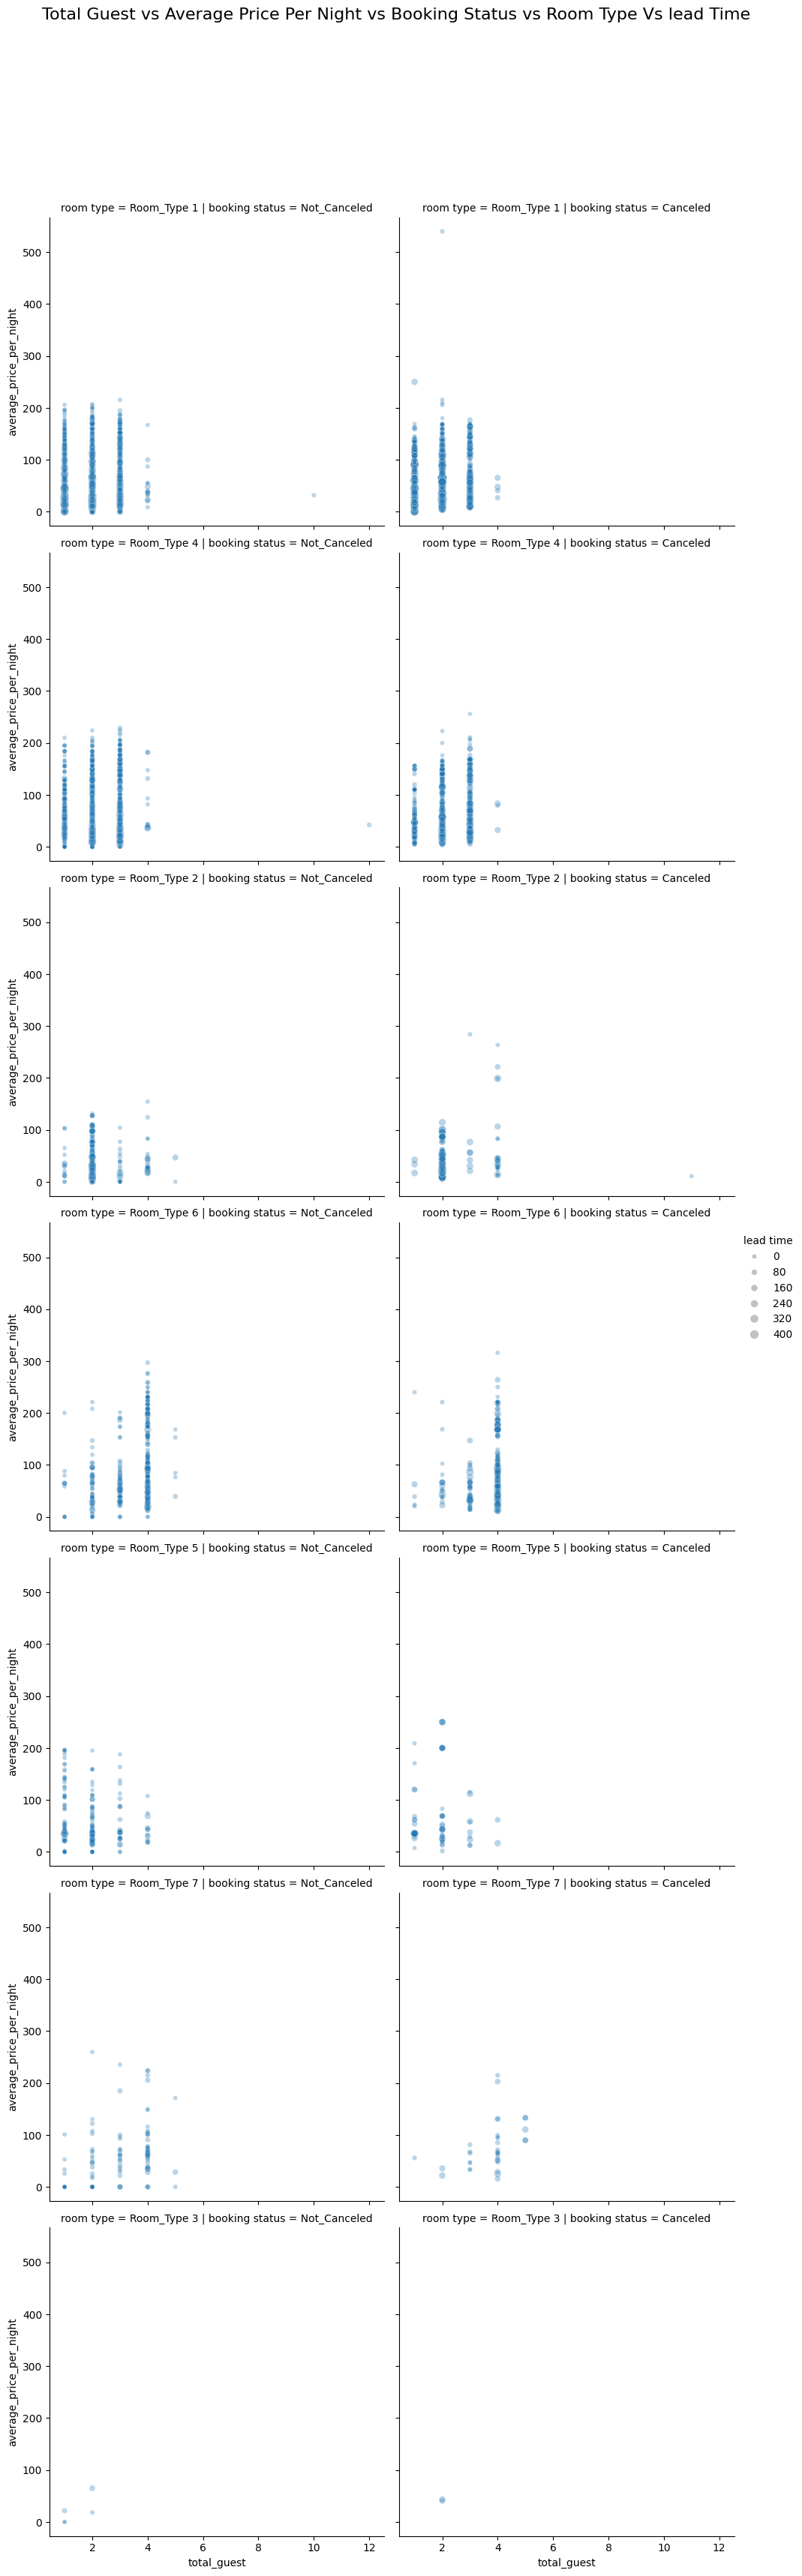

In [ ]:
title = 'Total Guest vs Average Price Per Night vs Booking Status vs Room Type Vs lead Time'
relation_features(data=df,
                x='total_guest',
                y='average_price_per_night',
                size='lead time',
                row='room type',
                col='booking status',
                alpha = 0.3,
                title = title
)

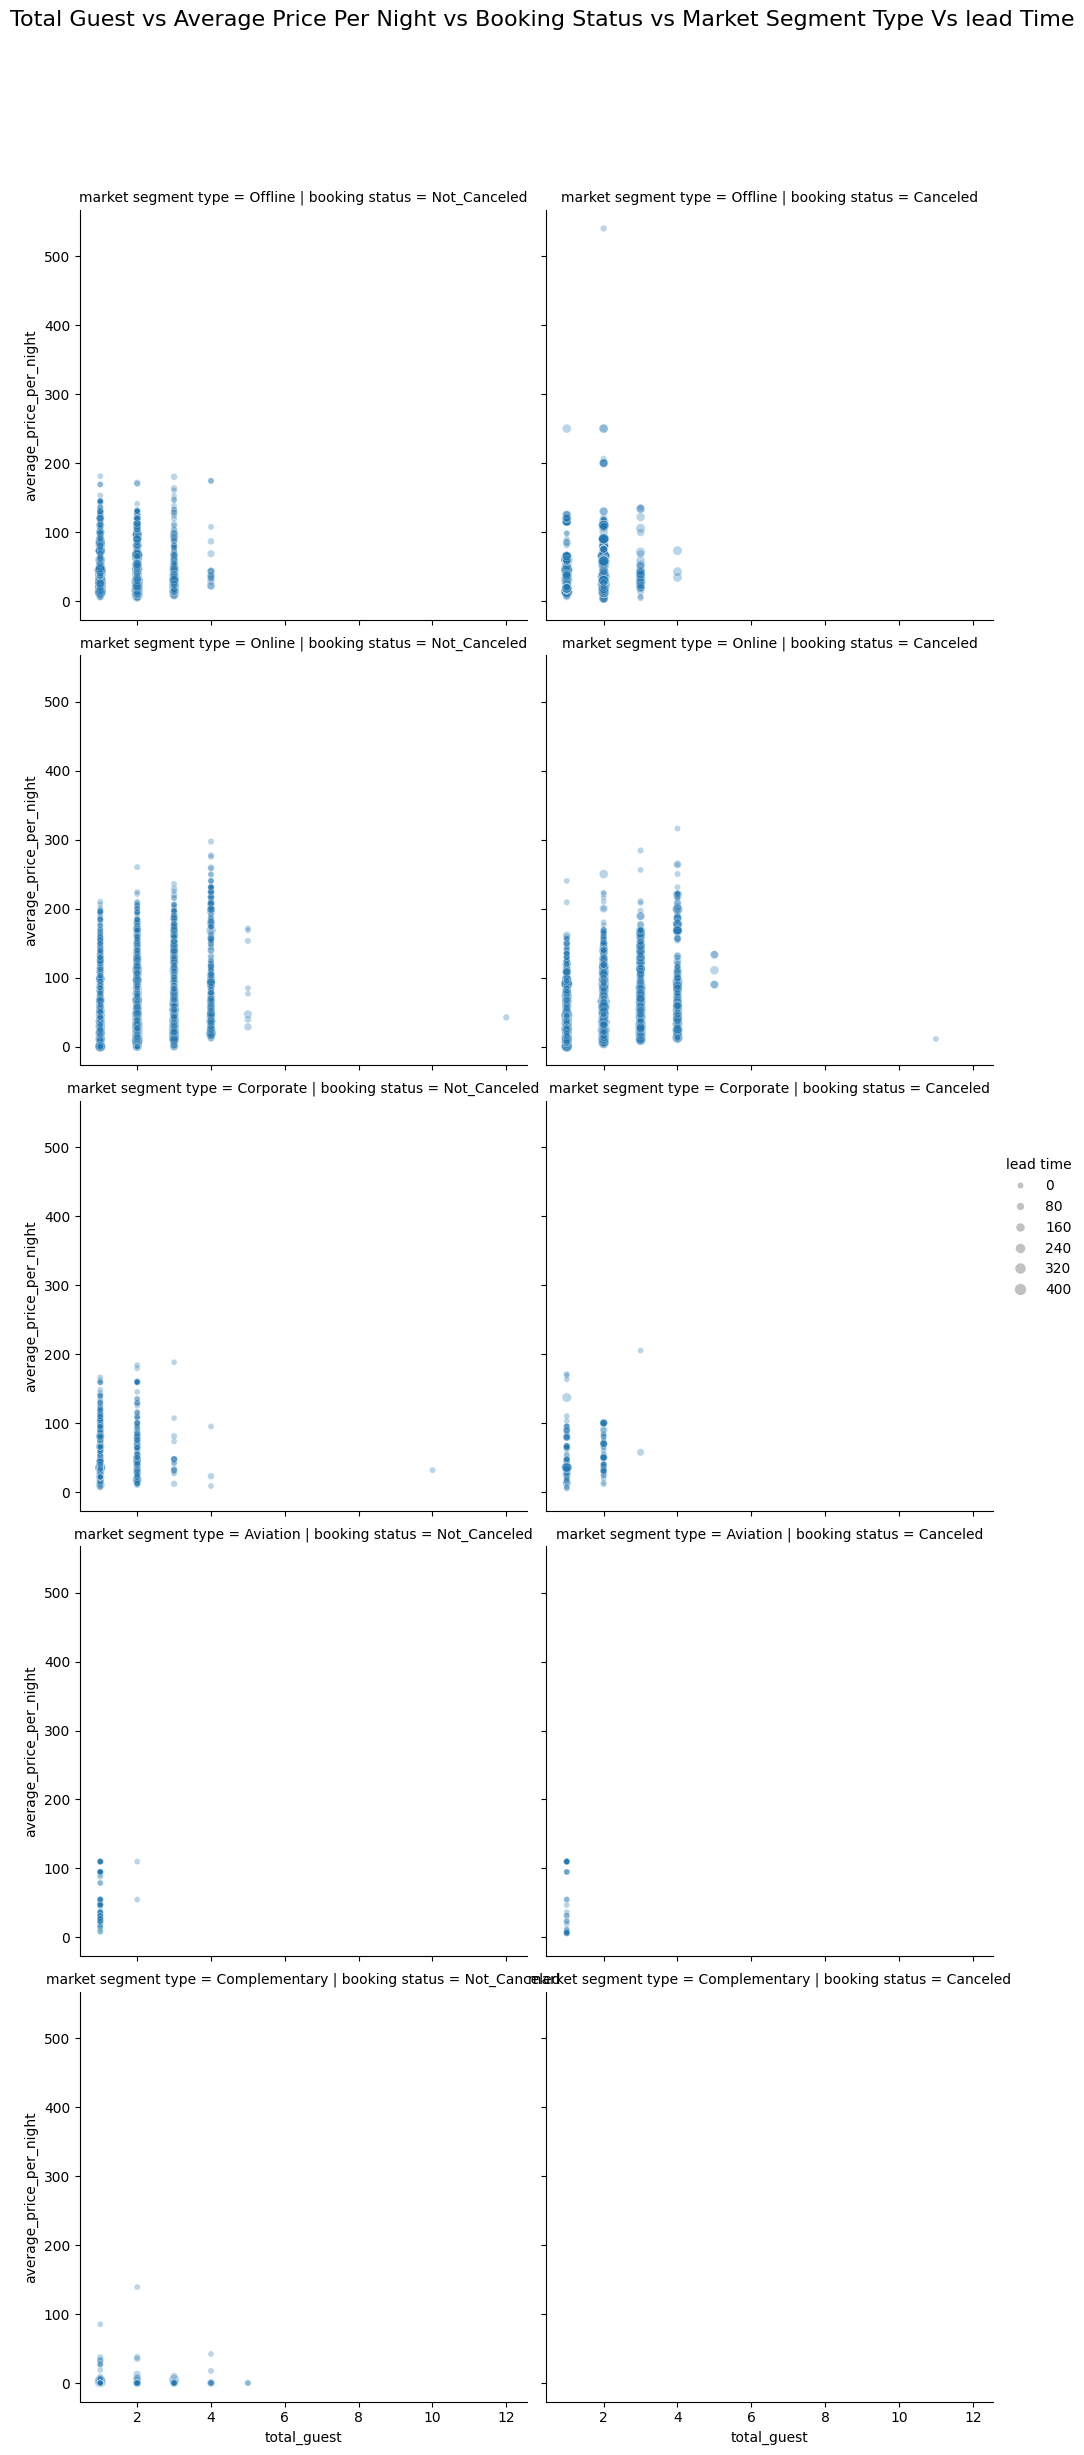

In [ ]:
title = 'Total Guest vs Average Price Per Night vs Booking Status vs Market Segment Type Vs lead Time'
relation_features(data=df,
                x='total_guest',
                y='average_price_per_night',
                size='lead time',
                row='market segment type',
                col='booking status',
                alpha = 0.3,
                title = title
)

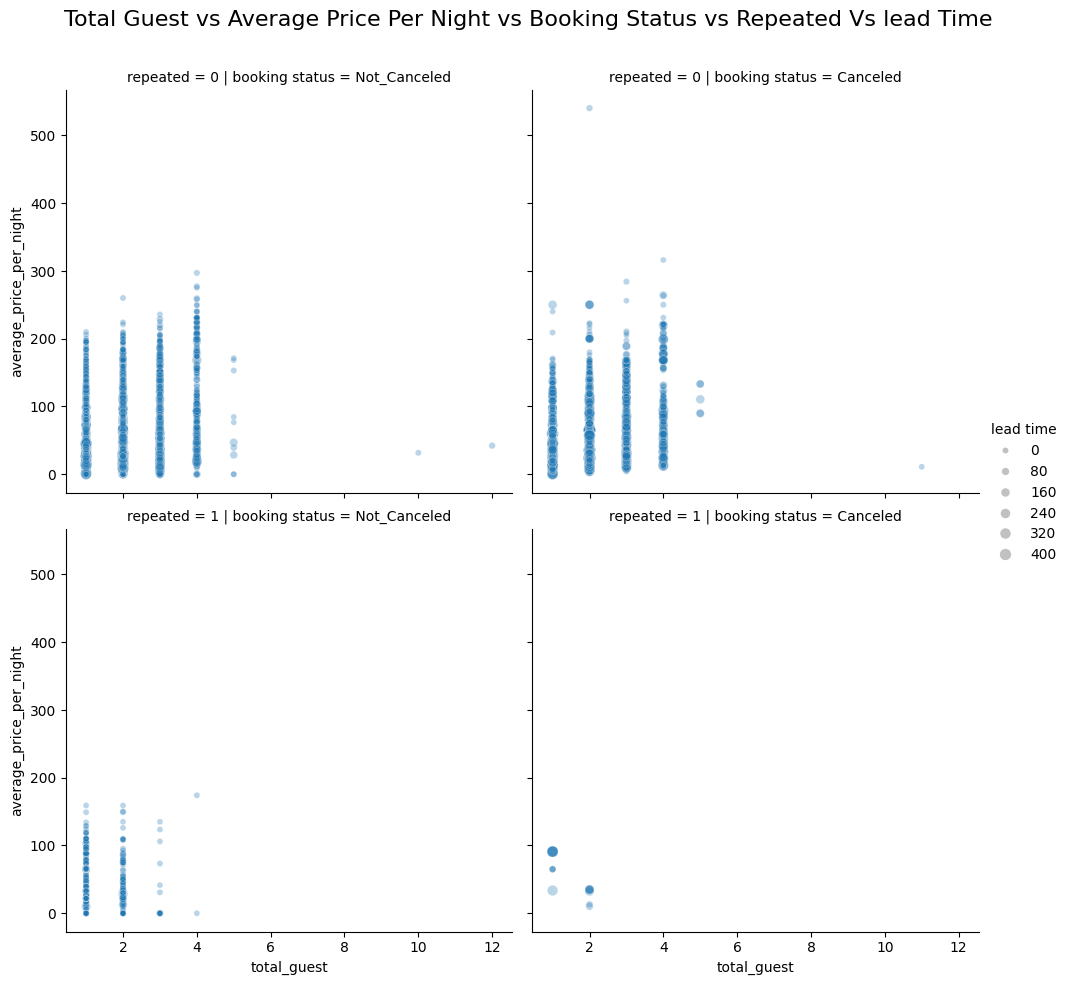

In [ ]:
title = 'Total Guest vs Average Price Per Night vs Booking Status vs Repeated Vs lead Time'
relation_features(data=df,
                x='total_guest',
                y='average_price_per_night',
                size='lead time',
                row='repeated',
                col='booking status',
                alpha = 0.3,
                title = title
)

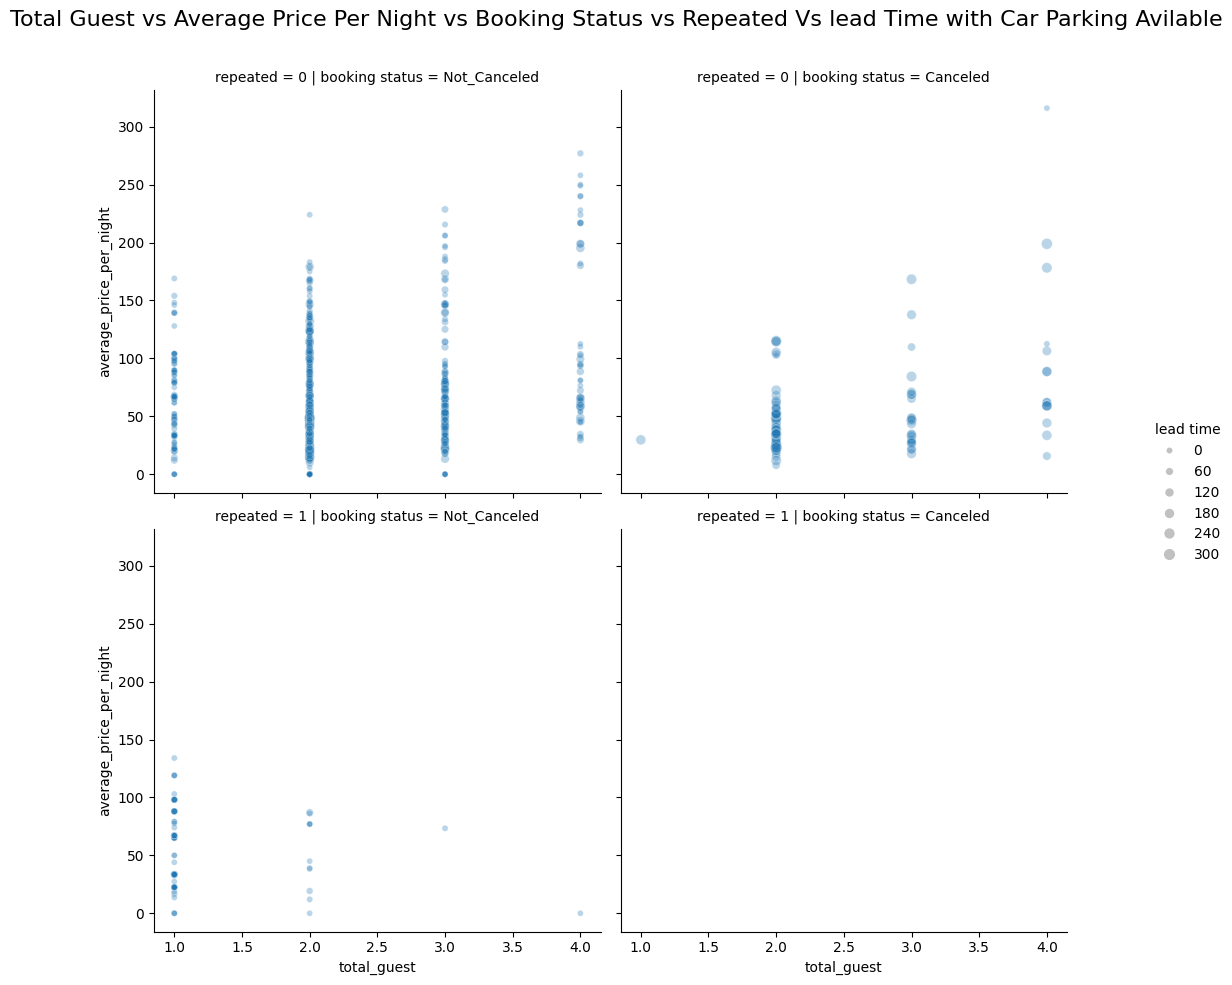

In [ ]:
title = 'Total Guest vs Average Price Per Night vs Booking Status vs Repeated Vs lead Time with Car Parking Avilable'
relation_features(data=df[df['car parking space'] == 1],
                x='total_guest',
                y='average_price_per_night',
                size='lead time',
                row='repeated',
                col='booking status',
                alpha = 0.3,
                title = title
)

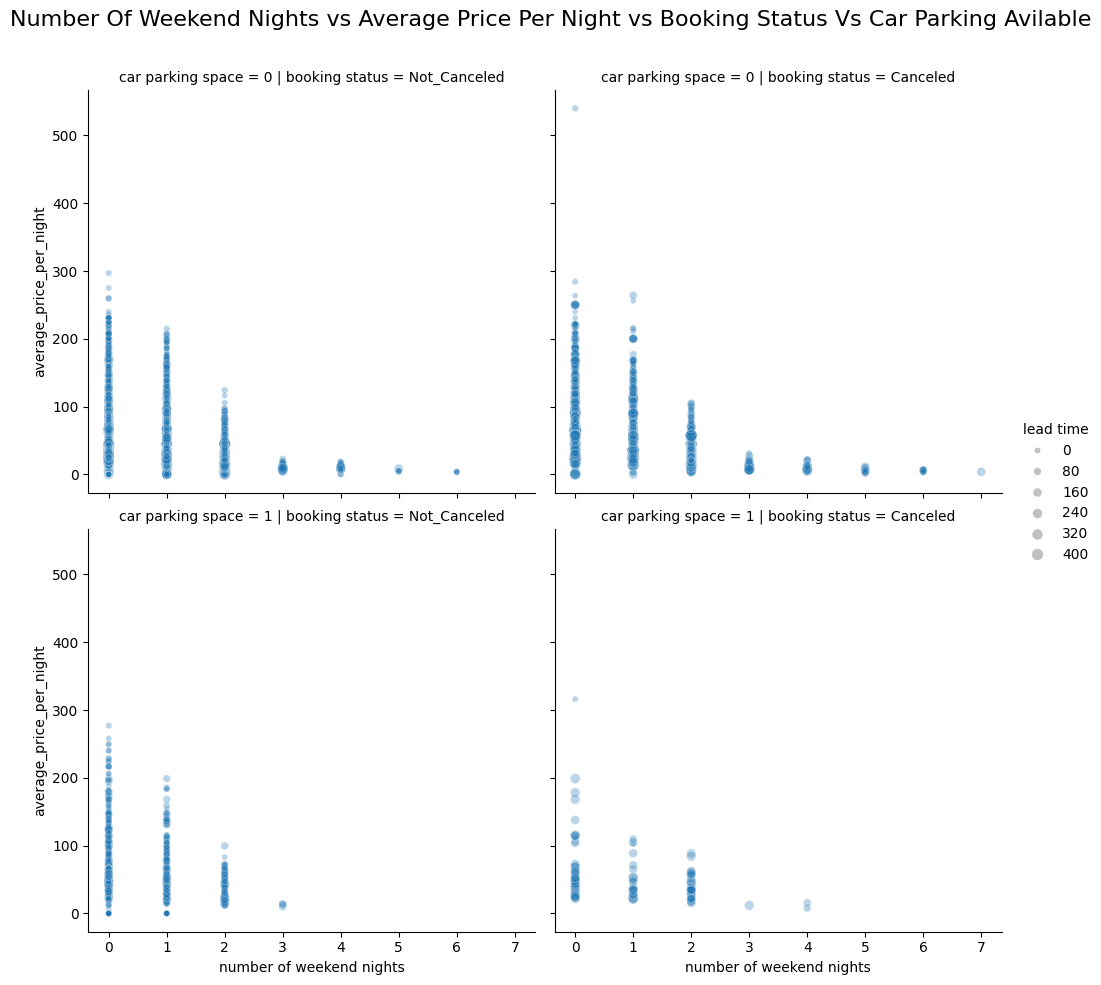

In [ ]:
title = 'Number Of Weekend Nights vs Average Price Per Night vs Booking Status Vs Car Parking Avilable'
relation_features(data=df,
                x='number of weekend nights',
                y='average_price_per_night',
                size='lead time',
                col='booking status',
                row='car parking space',
                alpha = 0.3,
                title = title
)

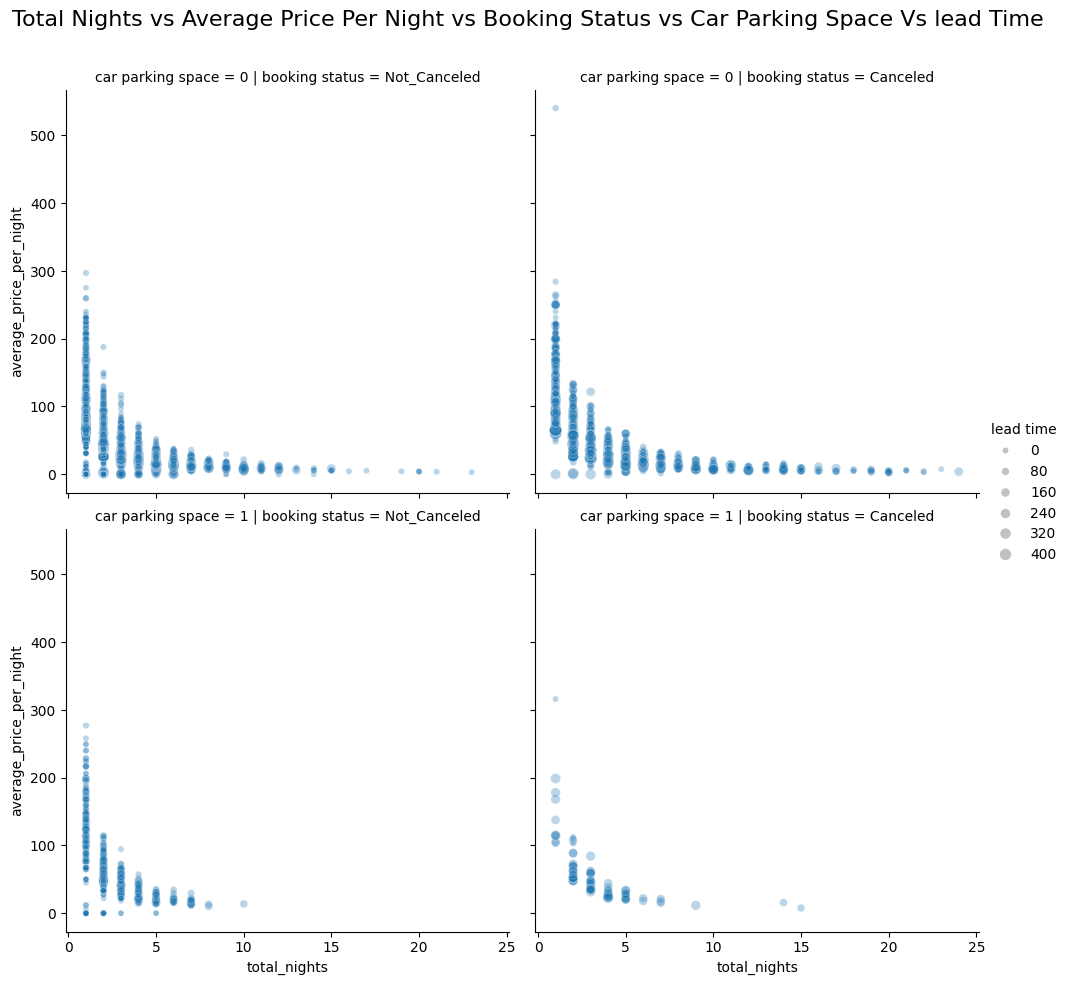

In [ ]:
title = 'Total Nights vs Average Price Per Night vs Booking Status vs Car Parking Space Vs lead Time'
relation_features(
    data=df,
    x='total_nights',
    y='average_price_per_night',
    size='lead time',
    row='car parking space',
    col='booking status',
    alpha=0.3,
    title=title
)

##Step 7: Advanced Insights


### Data Insights

#### Total Earns & losses

In [ ]:
earns_losses_matrix = df.groupby(['booking status', 'car parking space'])['average price '].sum()
earns_losses_matrix = earns_losses_matrix.unstack()
earns_losses_matrix

car parking space,0,1
booking status,,
Canceled,1299782.12,14906.63
Not_Canceled,2323102.75,114862.56


In [ ]:
total_earns = earns_losses_matrix[0][1] + earns_losses_matrix[1][1]
total_loss = earns_losses_matrix[0][0] + earns_losses_matrix[1][0]
loss_percent = round(total_loss/(total_earns+total_loss) * 100, 2)
loss_percent_earns = round(total_loss/(total_earns) * 100, 2)
parking_loss = earns_losses_matrix[0][0]
parking_loss_percent = round(parking_loss/(total_loss) * 100, 2)
print(f'The total earns of the resturant is: {total_earns}')
print('-'*50)
print(f'The total loss of the resturant is: {total_loss}')
print(f'The loss percent of the resturant is: {loss_percent}%')
print(f'The loss percent of the resturant out of all earns is: {loss_percent_earns}%')
print(f'The loss of the resturant beacause there isn\'t parking space is: {parking_loss}')
print(f'The percent of loss beacause there isn\'t parking space out of all loss is: {parking_loss_percent} ')

The total earns of the resturant is: 2437965.31
--------------------------------------------------
The total loss of the resturant is: 1314688.75
The loss percent of the resturant is: 35.03%
The loss percent of the resturant out of all earns is: 53.93%
The loss of the resturant beacause there isn't parking space is: 1299782.12
The percent of loss beacause there isn't parking space out of all loss is: 98.87 


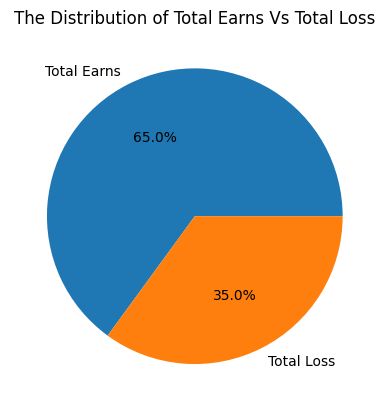

In [ ]:
plt.pie([total_earns, total_loss], labels=['Total Earns', 'Total Loss'], autopct='%1.1f%%')
plt.title('The Distribution of Total Earns Vs Total Loss')
plt.show()

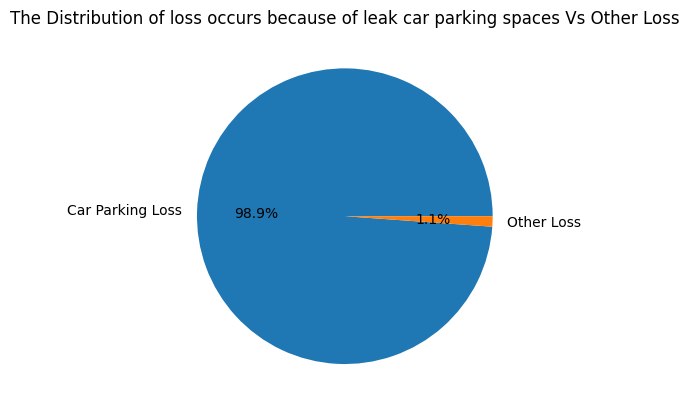

In [ ]:
other_loss = total_loss - parking_loss
plt.pie([parking_loss, other_loss], labels=['Car Parking Loss', 'Other Loss'], autopct='%1.1f%%')
plt.title('The Distribution of loss occurs because of leak car parking spaces Vs Other Loss')
plt.show()

#### Total Guests & percent of Childern to adults

In [ ]:
total_guests = df['total_guest'].sum()
total_children = df['number of children'].sum()
total_adults = df['number of adults'].sum()
print(f'The total guests of the hotel is: {total_guests}')
print(f'The total children of the hotel is: {total_children}')
print(f'The total adults of the hotel is: {total_adults}')
print(f'The total children percent of the hotel is: {round(total_children/total_guests * 100, 2)}%')
print(f'The total adults percent of the hotel is: {round(total_adults/total_guests * 100, 2)}%')



The total guests of the hotel is: 70763
The total children of the hotel is: 3823
The total adults of the hotel is: 66940
The total children percent of the hotel is: 5.4%
The total adults percent of the hotel is: 94.6%


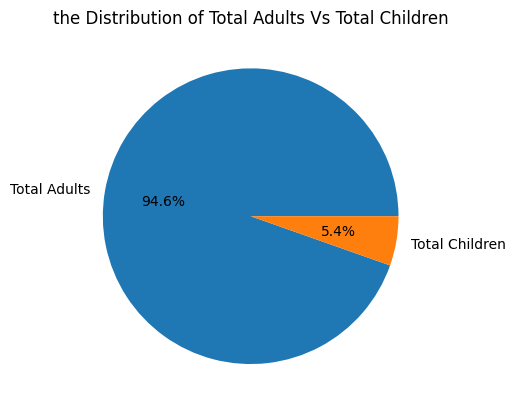

In [ ]:
plt.pie([total_adults, total_children], labels=['Total Adults', 'Total Children'], autopct='%1.1f%%')
plt.title('the Distribution of Total Adults Vs Total Children')
plt.show()

#### Total Nights & Percent of Weekend to Week Nights

In [ ]:
total_days = df['number of weekend nights'][df['booking status'] == 'Not_Canceled'].sum() + df['number of week nights'][df['booking status'] == 'Not_Canceled'].sum()
total_weekend_nights = df['number of weekend nights'][df['booking status'] == 'Not_Canceled'].sum()
total_week_nights = df['number of week nights'][df['booking status'] == 'Not_Canceled'].sum()
weekend_night_percent = round(total_weekend_nights/total_days * 100, 2)
week_night_percent = round(total_week_nights/total_days * 100, 2)
print(f'The total nights of the hotel is: {total_days}')
print(f'The total weekend nights of the hotel is: {total_weekend_nights}')
print(f'The total week nights of the hotel is: {total_week_nights}')
print(f'The weekend nights percent of the hotel is: {weekend_night_percent}%')
print(f'The week nights percent of the hotel is: {week_night_percent}%')

The total nights of the hotel is: 70419
The total weekend nights of the hotel is: 18866
The total week nights of the hotel is: 51553
The weekend nights percent of the hotel is: 26.79%
The week nights percent of the hotel is: 73.21%


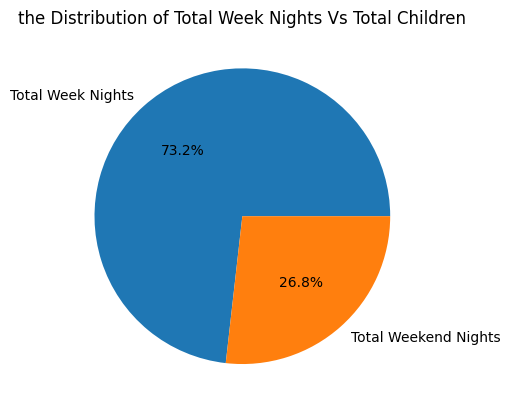

In [ ]:
plt.pie([total_week_nights, total_weekend_nights], labels=['Total Week Nights', 'Total Weekend Nights'], autopct='%1.1f%%')
plt.title('the Distribution of Total Week Nights Vs Total Children')
plt.show()

#### The denisty of hotel at Weekend vs week nights

In [ ]:
total_weekend_nights_guest = df['total_guest'][df['number of weekend nights'] > 0].sum()
total_week_nights_guest = df['total_guest'][df['number of week nights'] > 0].sum()
weekend_nights_guest_denisty = round(total_weekend_nights_guest/2, 2)
week_nights_guest_denisty = round(total_week_nights_guest/5, 2)
print(f'The total weekend nights guests of the hotel is: {total_weekend_nights_guest}')
print(f'The total week nights guests of the hotel is: {total_week_nights_guest}')
print(f'The weekend nights guests denisty of the hotel is: {weekend_nights_guest_denisty}')
print(f'The week nights guests denisty of the hotel is: {week_nights_guest_denisty}')


The total weekend nights guests of the hotel is: 39044
The total week nights guests of the hotel is: 66419
The weekend nights guests denisty of the hotel is: 19522.0
The week nights guests denisty of the hotel is: 13283.8


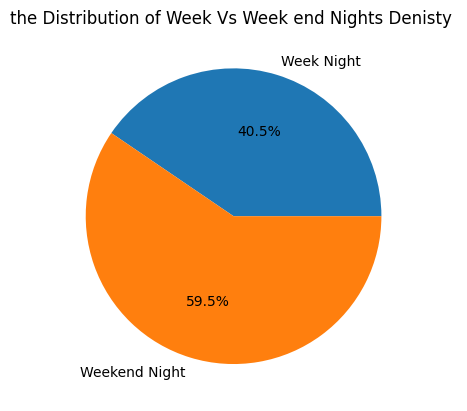

In [ ]:
plt.pie([week_nights_guest_denisty, weekend_nights_guest_denisty], labels=['Week Night', 'Weekend Night'], autopct='%1.1f%%')
plt.title('the Distribution of Week Vs Week end Nights Denisty ')
plt.show()